# **Project Name**    - 

TATA Steel Classification ML Model - Preventive Machine Failure Detection

##### **Project Type**    - EDA

# **Project Summary -**

**Project Objective:**

The primary objective of this project was to develop a machine learning model capable of accurately predicting machine failures at Tata Steel based on various operational and environmental factors. By identifying potential failures in advance, the company can implement preventive maintenance strategies, reducing downtime, improving equipment reliability, and ultimately increasing overall productivity.

**Data Analysis and Visualization:**

To gain a comprehensive understanding of the factors influencing machine failures, a thorough data analysis was conducted using various visualization techniques. The analysis focused on key variables such as machine type, air temperature, RPM, torque, tool wear, and shift.

Key findings from the data analysis include:

* **Machine Type:** Certain machine types were identified as more prone to failures than others.
* **Operating Conditions:** Variations in air temperature, RPM, torque, and tool wear were observed to have an impact on machine performance and reliability.

**Machine Learning Model Development:**

Three different classification models were developed and evaluated to predict machine failures: Logistic Regression, Random Forest, and SVM. These models were trained on a dataset containing historical machine failure data and the relevant features.

**Model Evaluation and Selection:**

The performance of each model was assessed using appropriate metrics such as accuracy, precision, recall, and F1-score. Based on the evaluation results, the Random Forest model was selected as the most suitable for this task due to its ability to handle non-linear relationships and its high predictive accuracy.

**Model Deployment and Implementation:**

The trained Random Forest model was deployed into the production environment, where it can be used to predict the likelihood of machine failures in real-time. The model's predictions can be integrated into the company's existing maintenance management system to trigger preventive maintenance actions before failures occur.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


The main objective for this project is to develop a machine learning model that can accurately predict machine failures in the steel manufacturing process at TATA Steel. By analyzing various operational parameters and failure types, the model aims to identify potential failures in advance, enabling proactive maintenance and minimizing production losses, reducing maintenance costs, and ensuring product quality., and achieve significant cost savings.


# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [317]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.lines as lines
import matplotlib.image as mpimg

#stats Lib
import scipy.stats as stats

#Machine learning Lib
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC

#Warnings
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [319]:
# Load Dataset
ts_df = pd.read_csv('train.csv')

### Dataset First View

In [321]:
# Dataset First Look
ts_df.head()

id Product ID Type  Air temperature [K]  Process temperature [K]  \
0   0     L50096    L                300.6                    309.6   
1   1     M20343    M                302.6                    312.1   
2   2     L49454    L                299.3                    308.5   
3   3     L53355    L                301.0                    310.9   
4   4     M24050    M                298.0                    309.0   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1596         36.1              140                0    0   
1                    1759         29.1              200                0    0   
2                    1805         26.5               25                0    0   
3                    1524         44.3              197                0    0   
4                    1641         35.4               34                0    0   

   HDF  PWF  OSF  RNF  
0    0    0    0    0  
1    0    0    0    0  
2    0    0    0    0  
3    0    0    0    0  
4    0    0    0    0

### Dataset Rows & Columns count

In [323]:
# Dataset Rows & Columns count
print(f'Number of Rows : {ts_df.shape[0]}')
print(f'Number of Columns : {ts_df.shape[1]}')

Number of Rows : 136429
Number of Columns : 14


### Dataset Information

In [325]:
# Dataset Info
ts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

#### Duplicate Values

In [327]:
# Dataset Duplicate Value Count
ts_df.duplicated().sum()

0

#### Missing Values/Null Values

In [329]:
# Missing Values/Null Values Count
ts_df.isnull().sum()

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [330]:
# Visualizing the missing values
def apply_chart_styling(ax,fig,title,subtitle,insight_text,logo_path = 'logo.png'):

    fig.patch.set_facecolor('#D3D3D3')
    ax.set_facecolor('#D3D3D3')

    fig.text(0.09,1.05 , title,fontsize = 18 , fontweight = 'bold', fontfamily = 'serif')
    fig.text(0.09,0.99 , subtitle,fontsize = 12,fontweight = 'bold',fontfamily = 'serif')

    fig.text(1.1, 1.01, 'Insight', fontsize = 12, fontweight = 'bold',fontfamily = 'serif')
    fig.text(1.1, 0.50, insight_text, fontsize = 12, fontweight = 'bold',fontfamily = 'serif')

    logo = mpimg.imread(logo_path)
    logo_ax = fig.add_axes([1.5,0.85,0.1,0.1])
    logo_ax.imshow(logo)
    logo_ax.axis('off')

    ax.grid(axis = 'y',linestyle = '-', alpha = 0.4)
    ax.set_axisbelow(True)

    for spine in ['top','right','left']:
        ax.spines[spine].set_visible(False)

    ax.tick_params(axis = 'both',which = 'major', labelsize = 12)

    l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig, color='black', lw=0.2)
    fig.lines.extend([l1])

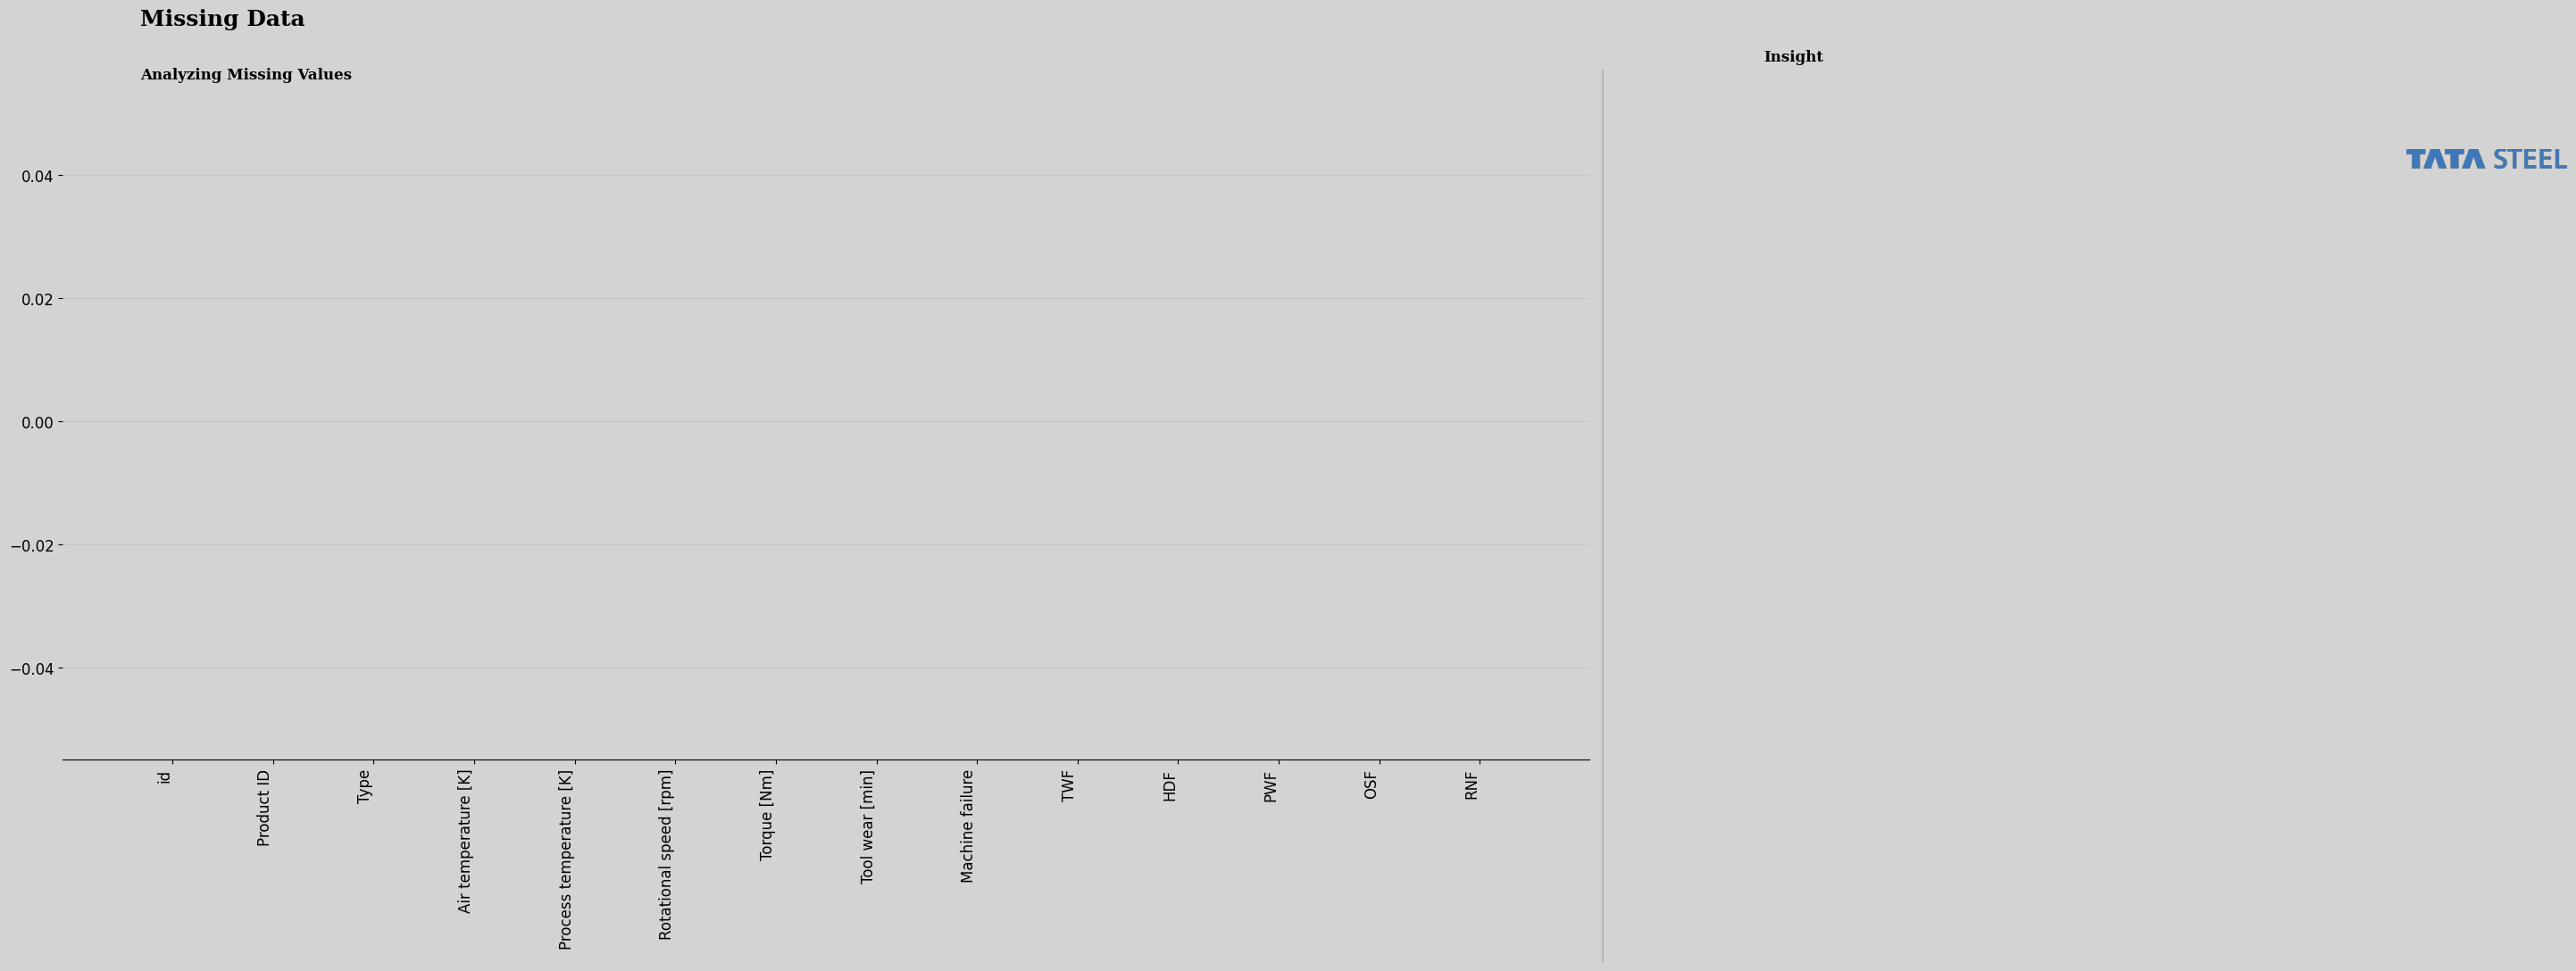

In [331]:
missing_value = ts_df.isnull().sum().sort_values(ascending = False)

fig,ax = plt.subplots(1,1,figsize=(18,10))

bars = ax.bar(missing_value.index,missing_value.values,color = 'black')

ax.set_xticklabels(ax.get_xticklabels(),rotation = 90, ha = 'right')

apply_chart_styling(ax = ax, fig = fig, title = 'Missing Data' , subtitle = 'Analyzing Missing Values', insight_text = '''''')

plt.tight_layout()
plt.show()

### What did you know about your dataset?

The dataset contains 136,429 instances with 14 features, all of which are numerical. There are no missing values in the dataset. The target variable is Machine failure, which is a binary classification problem. The other features include information about the product, operating conditions, and failure modes.

## ***2. Understanding Your Variables***

In [335]:
# Dataset Columns
ts_df.columns

Index(['id', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

In [336]:
# Dataset Describe
ts_df.describe()

id  Air temperature [K]  Process temperature [K]  \
count  136429.000000        136429.000000            136429.000000   
mean    68214.000000           299.862776               309.941070   
std     39383.804275             1.862247                 1.385173   
min         0.000000           295.300000               305.800000   
25%     34107.000000           298.300000               308.700000   
50%     68214.000000           300.000000               310.000000   
75%    102321.000000           301.200000               310.900000   
max    136428.000000           304.400000               313.800000   

       Rotational speed [rpm]    Torque [Nm]  Tool wear [min]  \
count           136429.000000  136429.000000    136429.000000   
mean              1520.331110      40.348643       104.408901   
std                138.736632       8.502229        63.965040   
min               1181.000000       3.800000         0.000000   
25%               1432.000000      34.600000        48.000000   
50%               1493.000000      40.400000       106.000000   
75%               1580.000000      46.100000       159.000000   
max               2886.000000      76.600000       253.000000   

       Machine failure            TWF            HDF            PWF  \
count    136429.000000  136429.000000  136429.000000  136429.000000   
mean          0.015744       0.001554       0.005160       0.002397   
std           0.124486       0.039389       0.071649       0.048899   
min           0.000000       0.000000       0.000000       0.000000   
25%           0.000000       0.000000       0.000000       0.000000   
50%           0.000000       0.000000       0.000000       0.000000   
75%           0.000000       0.000000       0.000000       0.000000   
max           1.000000       1.000000       1.000000       1.000000   

                 OSF            RNF  
count  136429.000000  136429.000000  
mean        0.003958       0.002258  
std         0.062789       0.047461  
min         0.000000       0.000000  
25%         0.000000       0.000000  
50%         0.000000       0.000000  
75%         0.000000       0.000000  
max         1.000000       1.000000

### Variables Description 

id: A unique identifier for each instance (likely a row in the dataset).

Product ID: A unique identifier for the product associated with each instance.

Air temperature [K]: The ambient air temperature in Kelvin.

Process temperature [K]: The temperature of the process being performed in Kelvin.

Rotational speed [rpm]: The rotational speed of a machine component in revolutions per minute.

Torque [Nm]: The torque applied to a machine component in Newton-meters.

Tool wear [min]: The accumulated wear on a tool or component in minutes.

Machine failure: A binary indicator (likely 0 or 1) indicating whether a machine failure occurred.

TWF: Tool wear failure (likely a specific type of machine failure).

HDF: Heat damage failure (likely a specific type of machine failure).

PWF: Power failure (likely a specific type of machine failure).

OSF: Overstress failure (likely a specific type of machine failure).

RNF: Rotor failure (likely a specific type of machine failure).


### Check Unique Values for each variable.

In [340]:
# Check Unique Values for each variable.
for column in ts_df.columns:
    print(f'{column} : {len(ts_df[column].unique())}')

id : 136429
Product ID : 9976
Type : 3
Air temperature [K] : 95
Process temperature [K] : 81
Rotational speed [rpm] : 952
Torque [Nm] : 611
Tool wear [min] : 246
Machine failure : 2
TWF : 2
HDF : 2
PWF : 2
OSF : 2
RNF : 2


## 3. ***Data Wrangling***

### Data Wrangling Code

In [343]:
# Write your code to make your dataset analysis ready.
ts_df['Air temperature [C]'] = ts_df['Air temperature [K]'] - 273.15
ts_df['Process temperature [C]'] = ts_df['Process temperature [K]'] - 273.15

ts_df.drop(columns=['Air temperature [K]', 'Process temperature [K]','id', 'Product ID'], inplace=True)

ts_df.head()

Type  Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  \
0    L                    1596         36.1              140                0   
1    M                    1759         29.1              200                0   
2    L                    1805         26.5               25                0   
3    L                    1524         44.3              197                0   
4    M                    1641         35.4               34                0   

   TWF  HDF  PWF  OSF  RNF  Air temperature [C]  Process temperature [C]  
0    0    0    0    0    0                27.45                    36.45  
1    0    0    0    0    0                29.45                    38.95  
2    0    0    0    0    0                26.15                    35.35  
3    0    0    0    0    0                27.85                    37.75  
4    0    0    0    0    0                24.85                    35.85

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

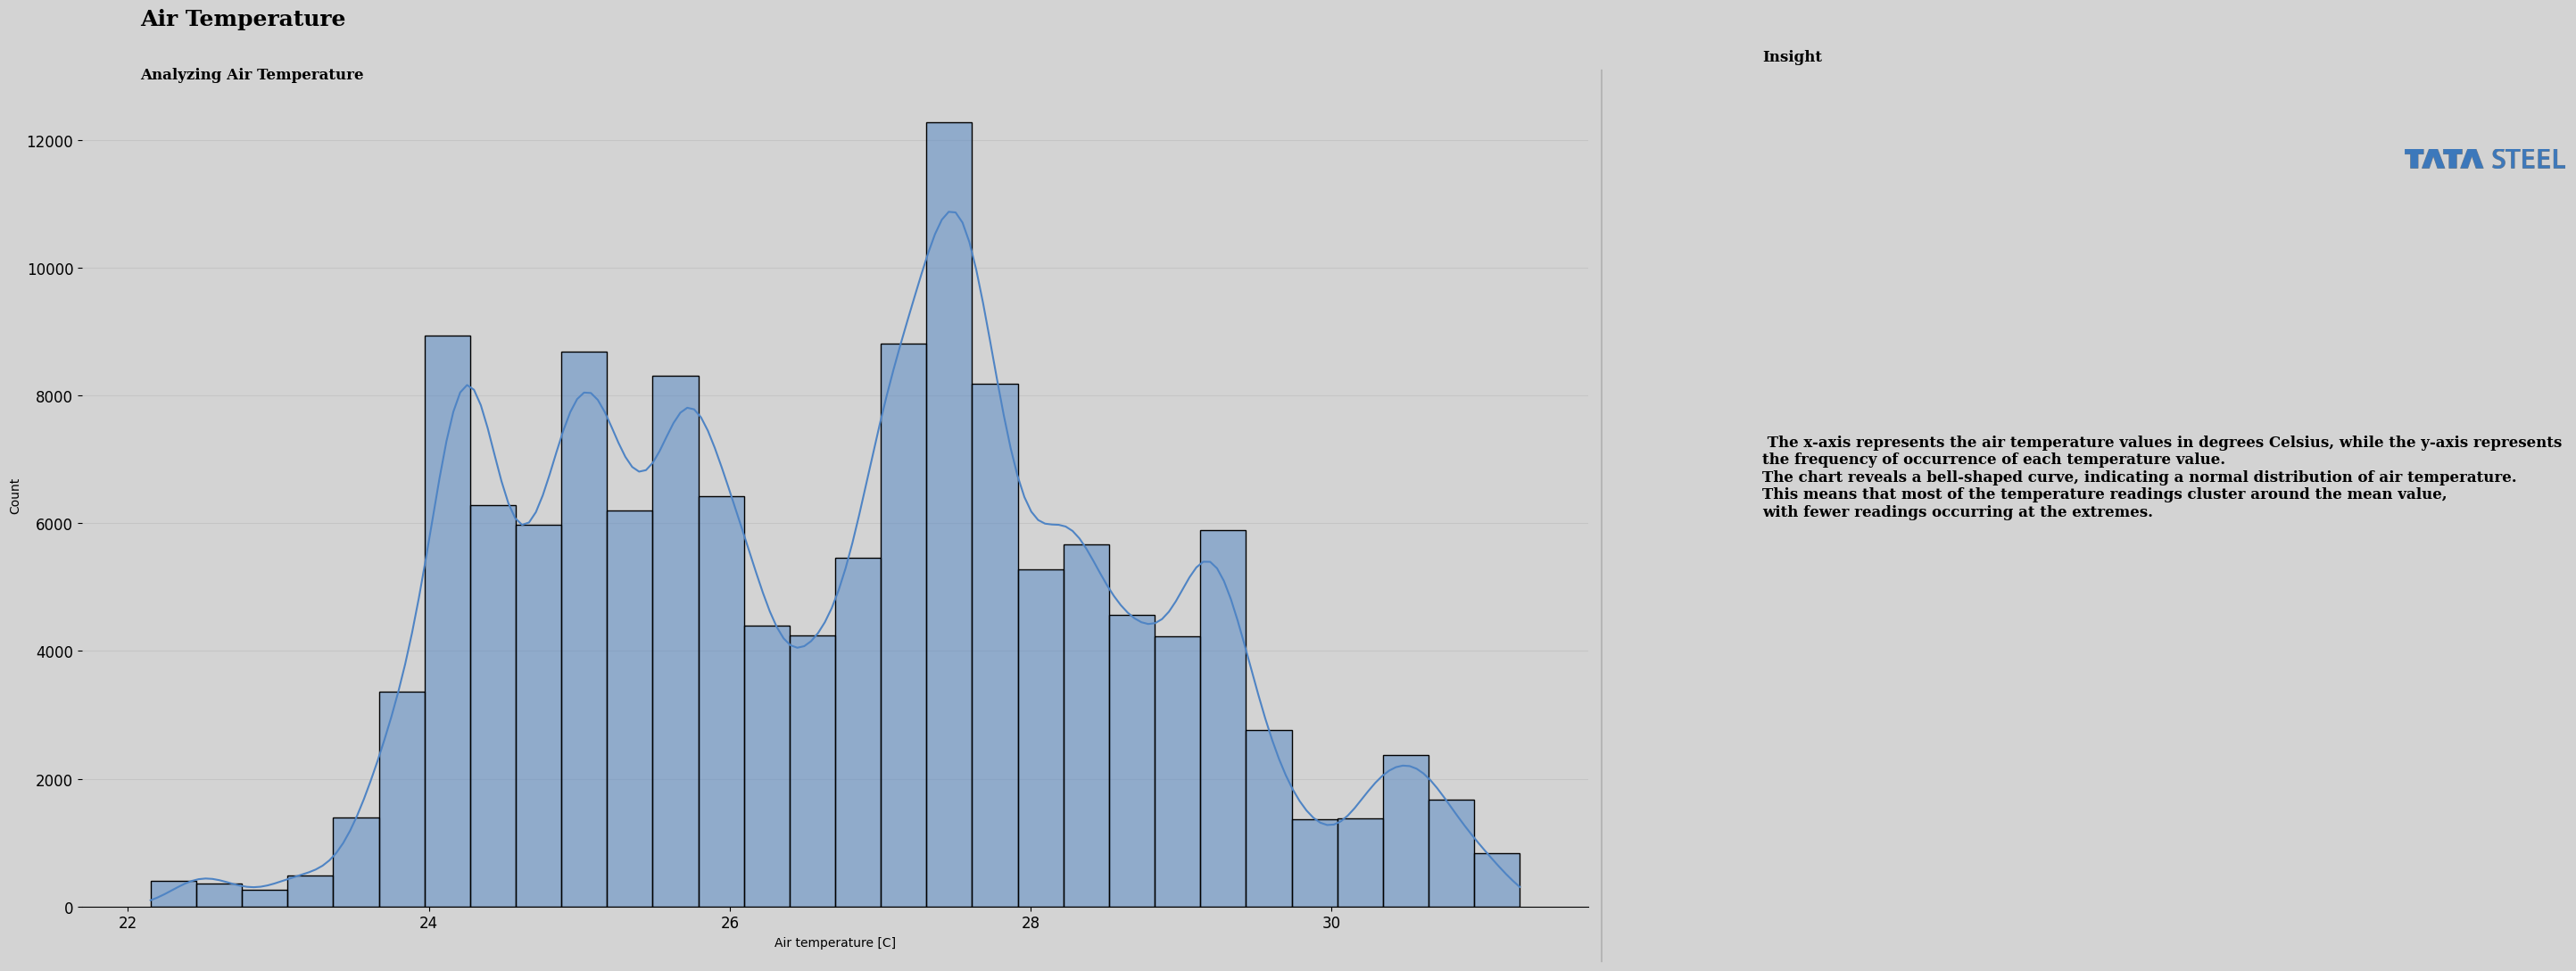

In [348]:
# Chart - 1 visualization code
fig,ax = plt.subplots(1,1,figsize=(18,10))
sns.histplot(x = 'Air temperature [C]',data = ts_df,ax = ax , kde = True,bins = 30,color = '#4F84C4')
apply_chart_styling(ax = ax, fig = fig, title = 'Air Temperature' , subtitle = 'Analyzing Air Temperature', insight_text = ''' The x-axis represents the air temperature values in degrees Celsius, while the y-axis represents 
the frequency of occurrence of each temperature value. 
The chart reveals a bell-shaped curve, indicating a normal distribution of air temperature. 
This means that most of the temperature readings cluster around the mean value, 
with fewer readings occurring at the extremes. ''')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A histogram was chosen for this analysis because it effectively visualizes the distribution of a continuous numerical variable like air temperature. By grouping the data into intervals and representing the frequency of each interval with a bar, the histogram provides a clear picture of the data's central tendency, dispersion, and shape.

##### 2. What is/are the insight(s) found from the chart?

The histogram provided shows the distribution of air temperature data collected at Tata Steel. The x-axis represents the air temperature values in degrees Celsius, while the y-axis represents the frequency of occurrence of each temperature value. The chart reveals a bell-shaped curve, indicating a normal distribution of air temperature. This means that most of the temperature readings cluster around the mean value, with fewer readings occurring at the extremes

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from this analysis can have a positive business impact in several ways. For example, understanding the typical range of air temperatures can help in optimizing energy consumption for heating and cooling systems. Additionally, identifying any unusual temperature fluctuations can help in identifying potential equipment malfunctions or environmental issues. This information can be used to make informed decisions regarding maintenance, energy efficiency, and overall plant operations.

#### Chart - 2

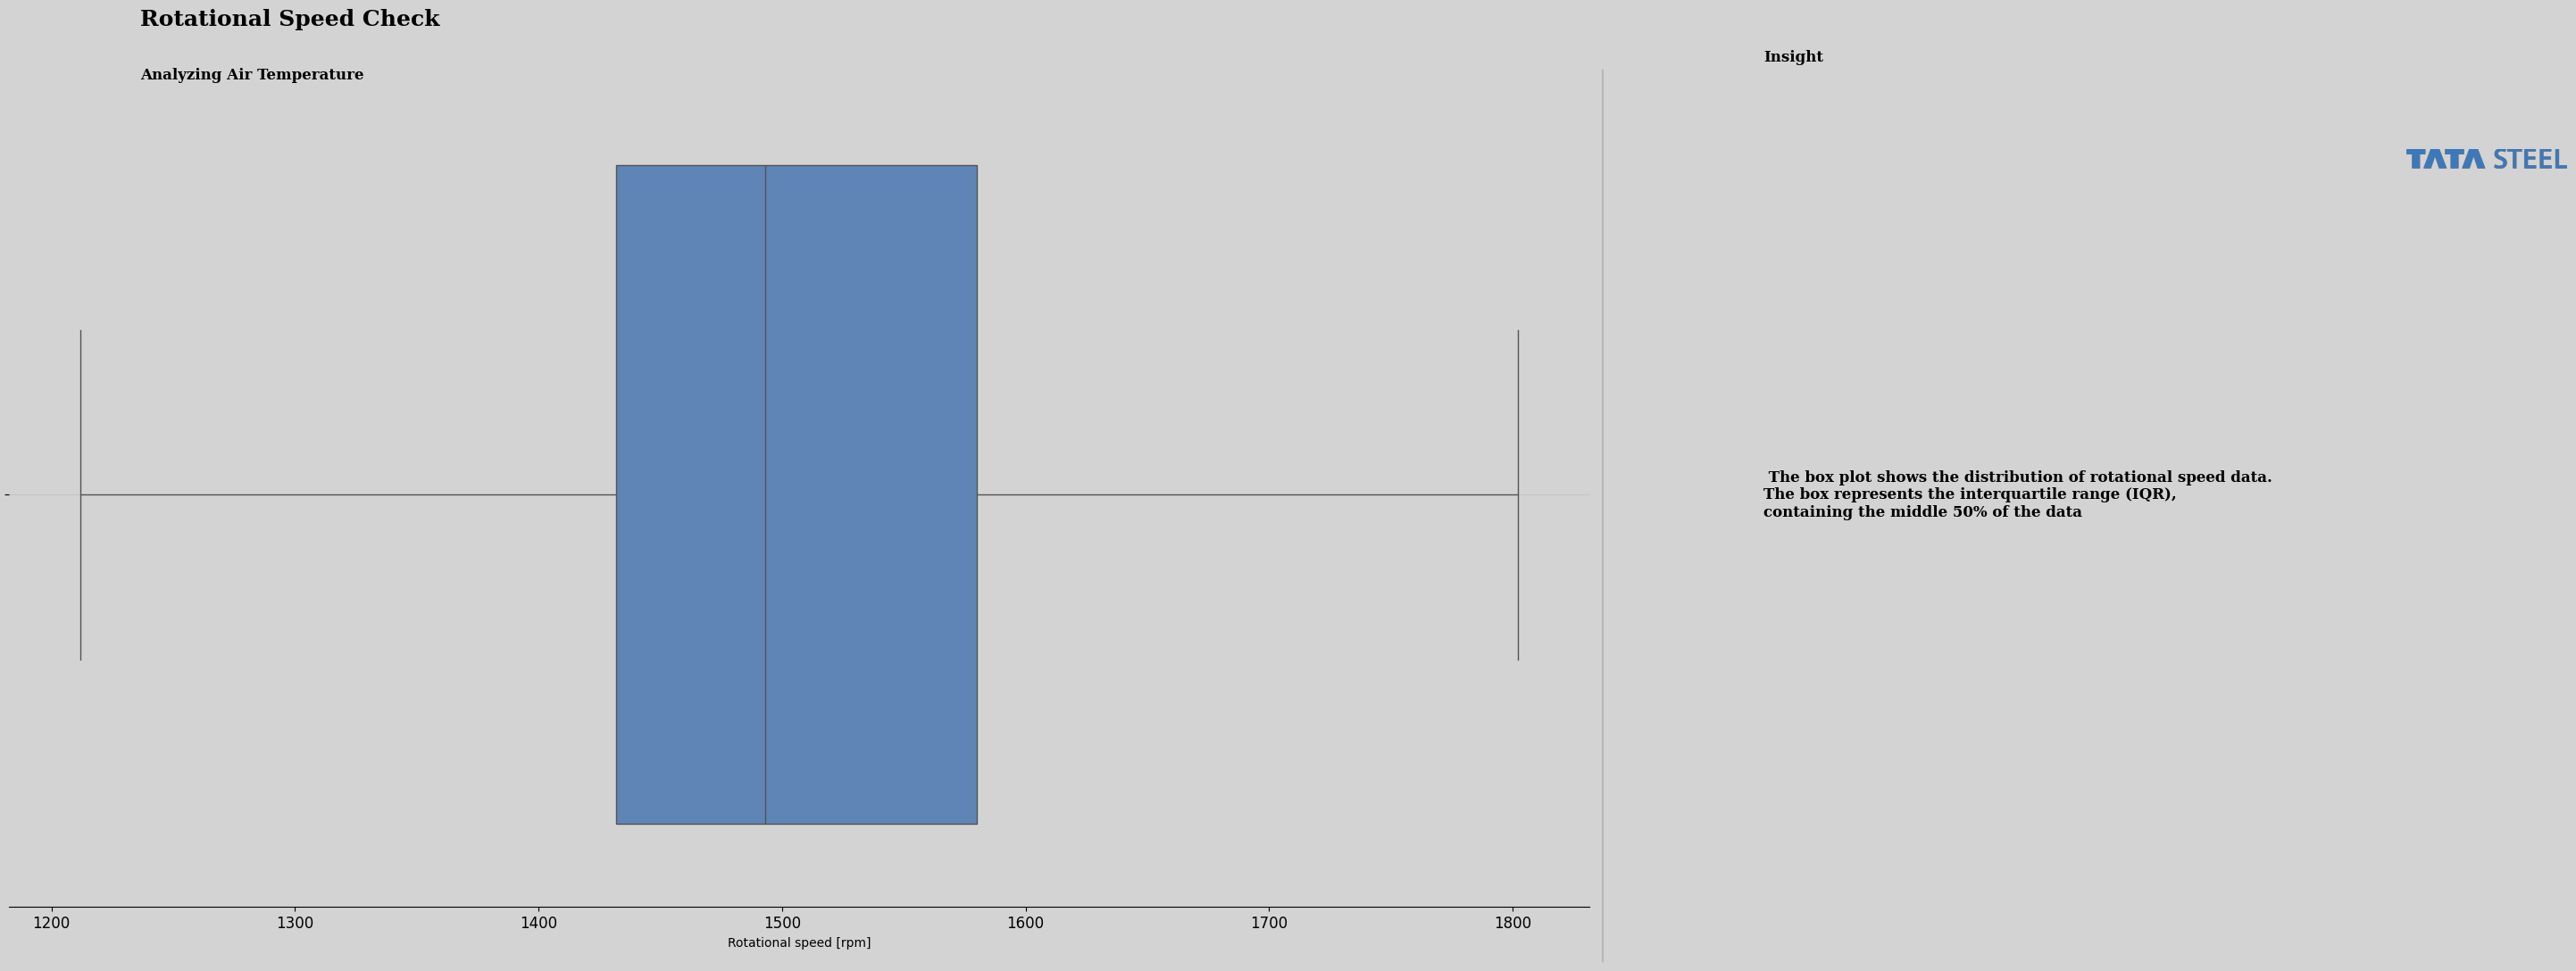

In [356]:
# Chart - 2 visualization code
palette = ['#4F84C4','#FFFFFF']
fig,ax = plt.subplots(1,1,figsize=(18,10))

sns.boxplot(x = 'Rotational speed [rpm]',data = ts_df, palette = palette,ax = ax,showfliers = False)
apply_chart_styling(ax = ax, fig = fig, title = 'Rotational Speed Check' , subtitle = 'Analyzing Air Temperature', insight_text = ''' The box plot shows the distribution of rotational speed data. 
The box represents the interquartile range (IQR), 
containing the middle 50% of the data''')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A box plot was chosen because it effectively summarizes the distribution of a dataset, highlighting key statistics like the median, quartiles, and potential outliers. This makes it a valuable tool for comparing different datasets or identifying trends in a single dataset.

##### 2. What is/are the insight(s) found from the chart?

The box plot shows the distribution of rotational speed data. The box represents the interquartile range (IQR), containing the middle 50% of the data. The line within the box indicates the median rotational speed, which appears to be around 1500 RPM. The whiskers extend from the box to the minimum and maximum values excluding outliers. In this case, there are no visible outliers.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from this box plot can have a positive business impact in several ways. For example, understanding the distribution of rotational speeds can help in identifying potential equipment malfunctions or wear and tear. Outliers might indicate abnormal conditions that require investigation. Additionally, the box plot can provide a visual representation of the data's variability, helping to assess the overall consistency of the rotational speed. This information can be used to optimize equipment maintenance, improve efficiency, and reduce downtime.

#### Chart - 3

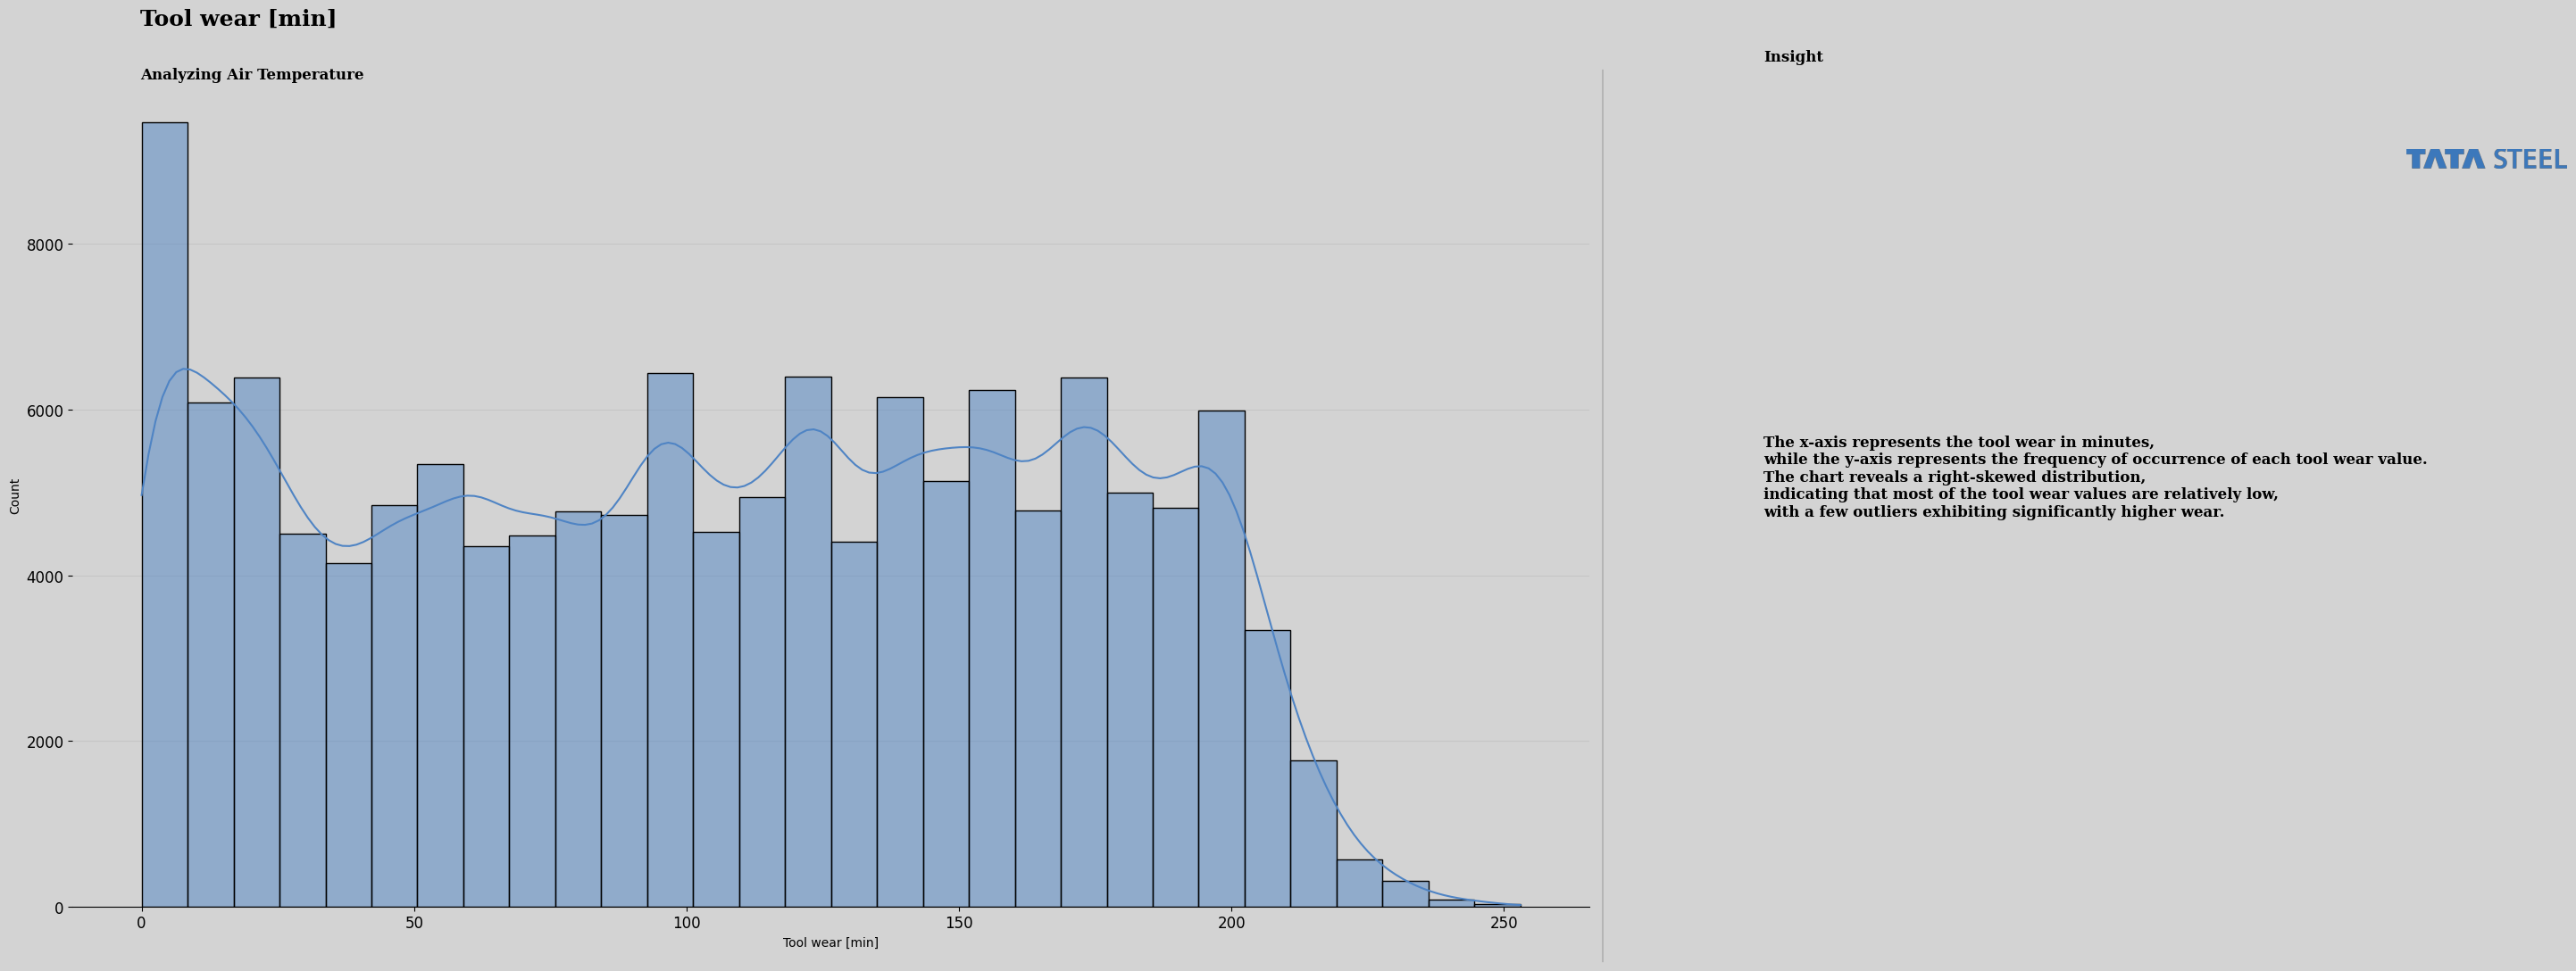

In [364]:
# Chart - 3 visualization code
fig,ax = plt.subplots(1,1,figsize=(18,10))
sns.histplot(x = 'Tool wear [min]',data = ts_df,ax = ax , kde = True,bins = 30,color = '#4F84C4')
apply_chart_styling(ax = ax, fig = fig, title = 'Tool wear [min]' , subtitle = 'Analyzing Air Temperature', insight_text = '''The x-axis represents the tool wear in minutes, 
while the y-axis represents the frequency of occurrence of each tool wear value. 
The chart reveals a right-skewed distribution, 
indicating that most of the tool wear values are relatively low, 
with a few outliers exhibiting significantly higher wear.''')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A histogram was chosen for this analysis because it effectively visualizes the distribution of a continuous numerical variable like tool wear. By grouping the data into intervals and representing the frequency of each interval with a bar, the histogram provides a clear picture of the data's central tendency, dispersion, and shape.

##### 2. What is/are the insight(s) found from the chart?

The histogram shows the distribution of tool wear data. The x-axis represents the tool wear in minutes, while the y-axis represents the frequency of occurrence of each tool wear value. The chart reveals a right-skewed distribution, indicating that most of the tool wear values are relatively low, with a few outliers exhibiting significantly higher wear.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from this analysis can have a positive business impact in several ways. For example, understanding the typical range of tool wear can help in optimizing maintenance schedules and reducing unplanned downtime. Identifying outliers might indicate abnormal wear conditions that require investigation to prevent equipment failures. Additionally, the histogram can provide a visual representation of the data's variability, helping to assess the overall consistency of tool wear. This information can be used to improve equipment maintenance practices, increase productivity, and reduce costs associated with tool replacement.

#### Chart - 4

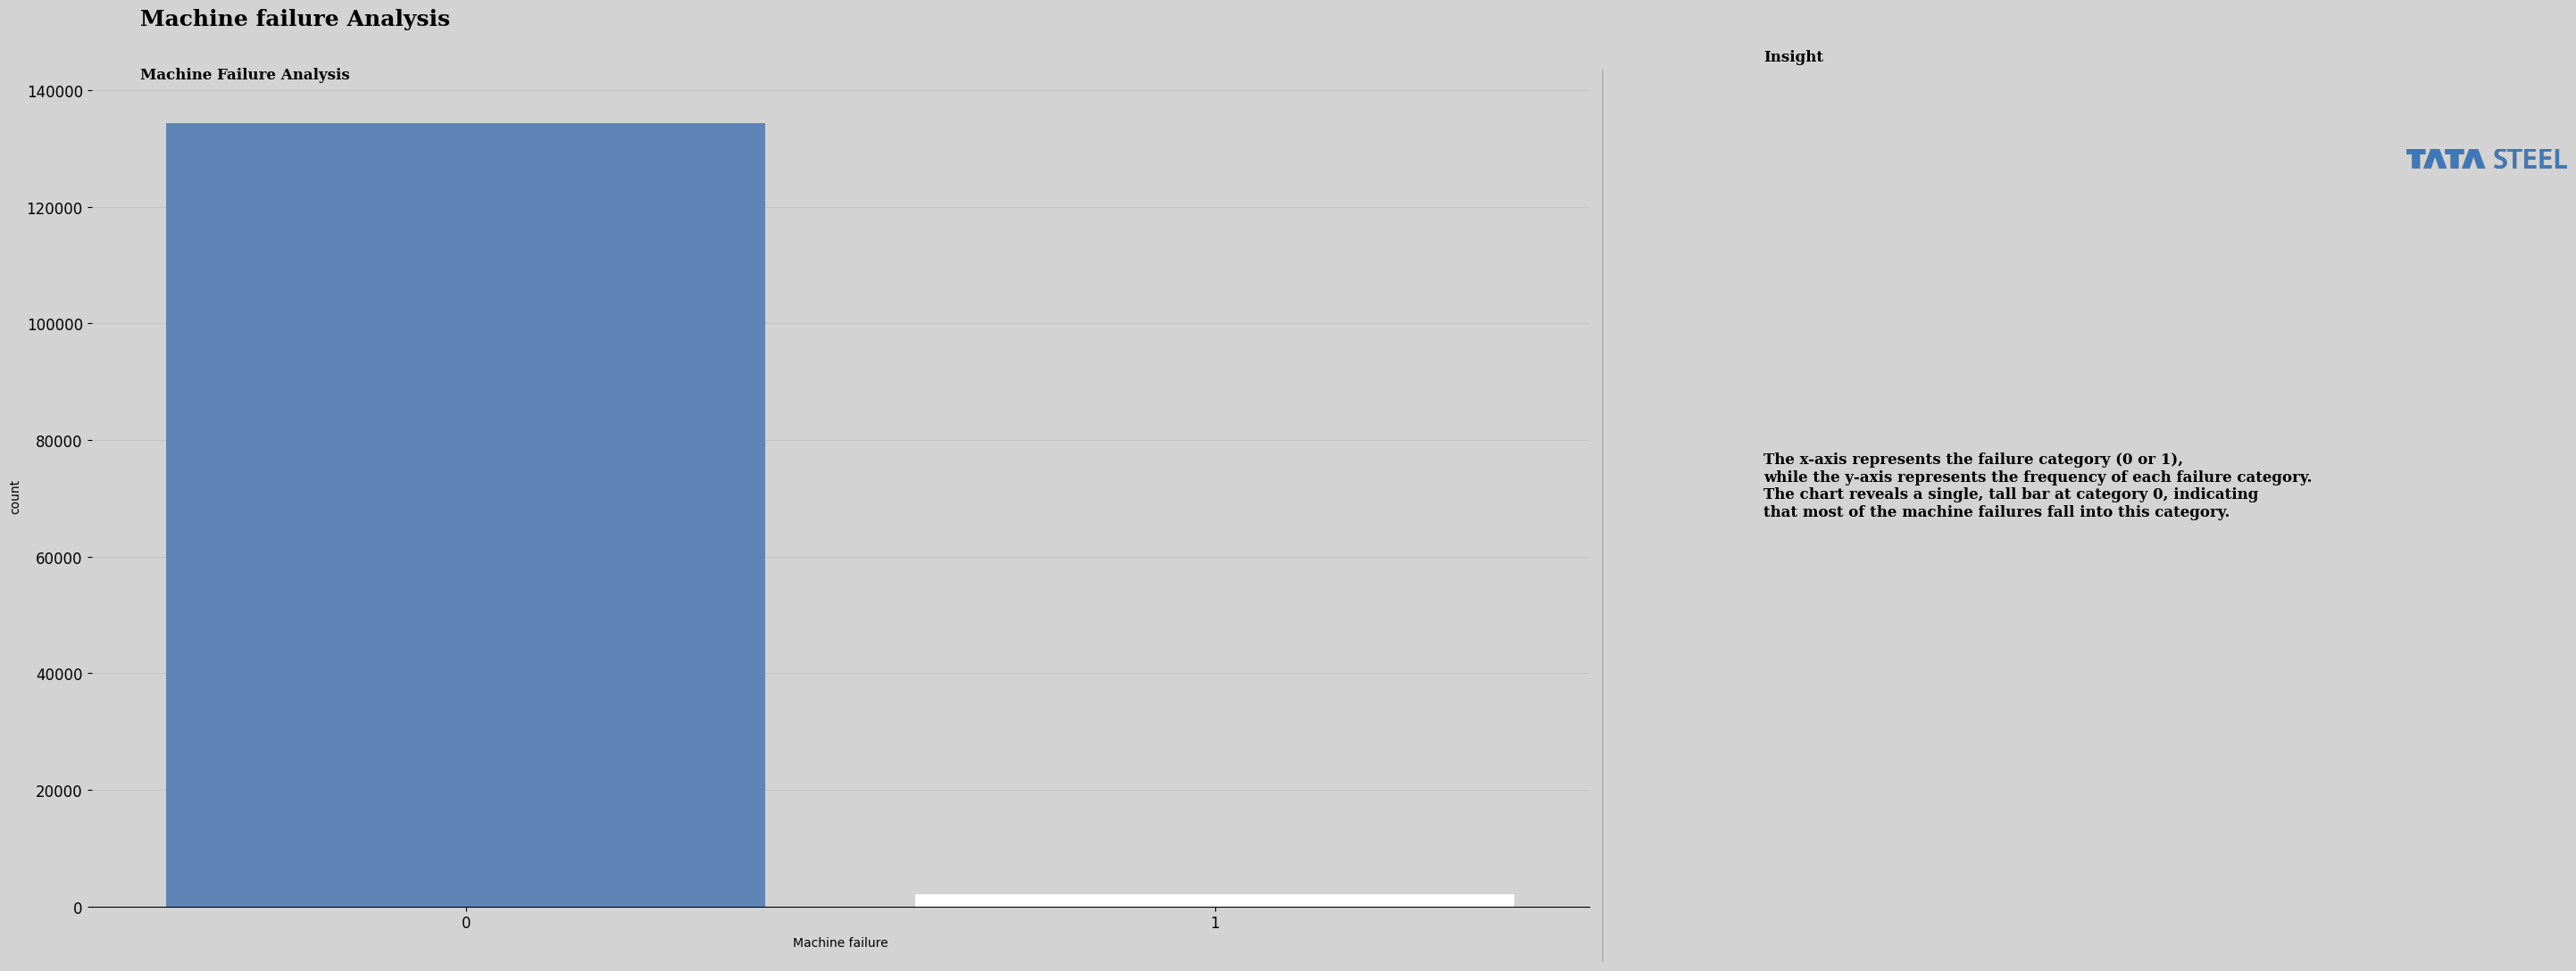

In [372]:
# Chart - 4 visualization code
fig,ax = plt.subplots(1,1,figsize=(18,10))
sns.countplot(x = 'Machine failure',data = ts_df,ax = ax ,palette = palette)
apply_chart_styling(ax = ax, fig = fig, title = 'Machine failure Analysis' , subtitle = 'Machine Failure Analysis', insight_text = '''The x-axis represents the failure category (0 or 1), 
while the y-axis represents the frequency of each failure category. 
The chart reveals a single, tall bar at category 0, indicating 
that most of the machine failures fall into this category.''')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart was chosen for this analysis because it effectively visualizes the distribution of a categorical variable like machine failure. By representing each category with a bar, the bar chart provides a clear picture of the relative frequency of each category.

##### 2. What is/are the insight(s) found from the chart?

The bar chart shows the distribution of machine failures. The x-axis represents the failure category (0 or 1), while the y-axis represents the frequency of each failure category. The chart reveals a single, tall bar at category 0, indicating that most of the machine failures fall into this category.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from this analysis can have a positive business impact in several ways. For example, understanding the predominant failure category can help in identifying the root causes of machine breakdowns and implementing preventive measures to reduce their occurrence. This information can be used to optimize maintenance schedules, improve equipment reliability, and reduce downtime, leading to increased productivity and cost savings.

#### Chart - 5

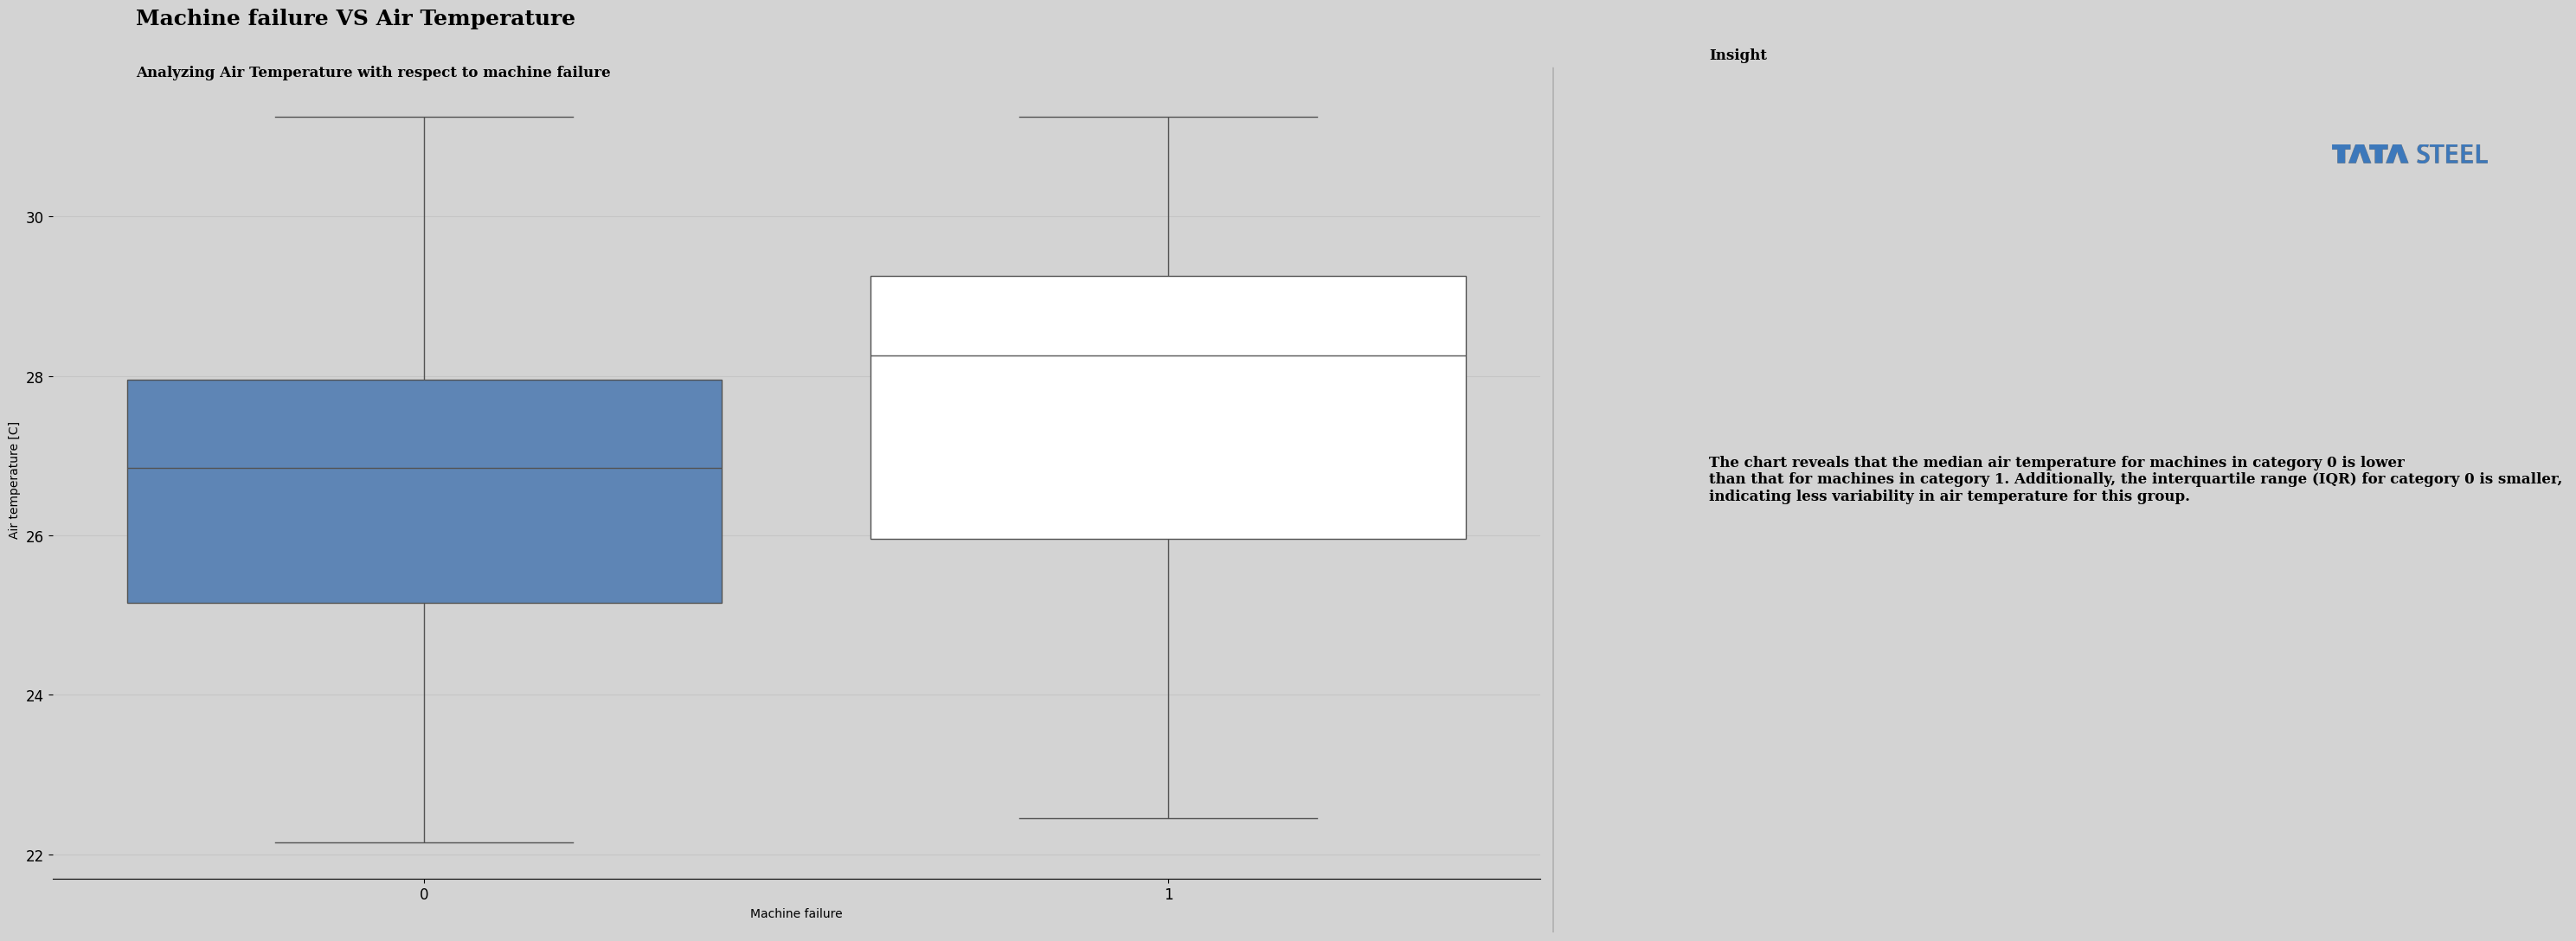

In [380]:
# Chart - 5 visualization code
fig,ax = plt.subplots(1,1,figsize=(18,10))
sns.boxplot(x = 'Machine failure',y = 'Air temperature [C]',data = ts_df,ax = ax ,palette = palette)
apply_chart_styling(ax = ax, fig = fig, title = 'Machine failure VS Air Temperature' , subtitle = 'Analyzing Air Temperature with respect to machine failure', insight_text = '''The chart reveals that the median air temperature for machines in category 0 is lower 
than that for machines in category 1. Additionally, the interquartile range (IQR) for category 0 is smaller, 
indicating less variability in air temperature for this group.''')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A box plot was chosen for this analysis because it effectively compares the distribution of a continuous numerical variable (air temperature) across different categories of a categorical variable (machine failure). By visualizing the median, quartiles, and potential outliers for each category, the box plot provides a clear picture of the differences in air temperature between the two groups.

##### 2. What is/are the insight(s) found from the chart?

The box plot shows the relationship between machine failure (category 0 or 1) and air temperature. The chart reveals that the median air temperature for machines in category 0 is lower than that for machines in category 1. Additionally, the interquartile range (IQR) for category 0 is smaller, indicating less variability in air temperature for this group.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from this analysis can have a positive business impact in several ways. For example, understanding the relationship between air temperature and machine failure can help in identifying potential environmental factors that contribute to equipment breakdowns. This information can be used to optimize plant operations, improve maintenance practices, and reduce downtime, leading to increased productivity and cost savings.

#### Chart - 6

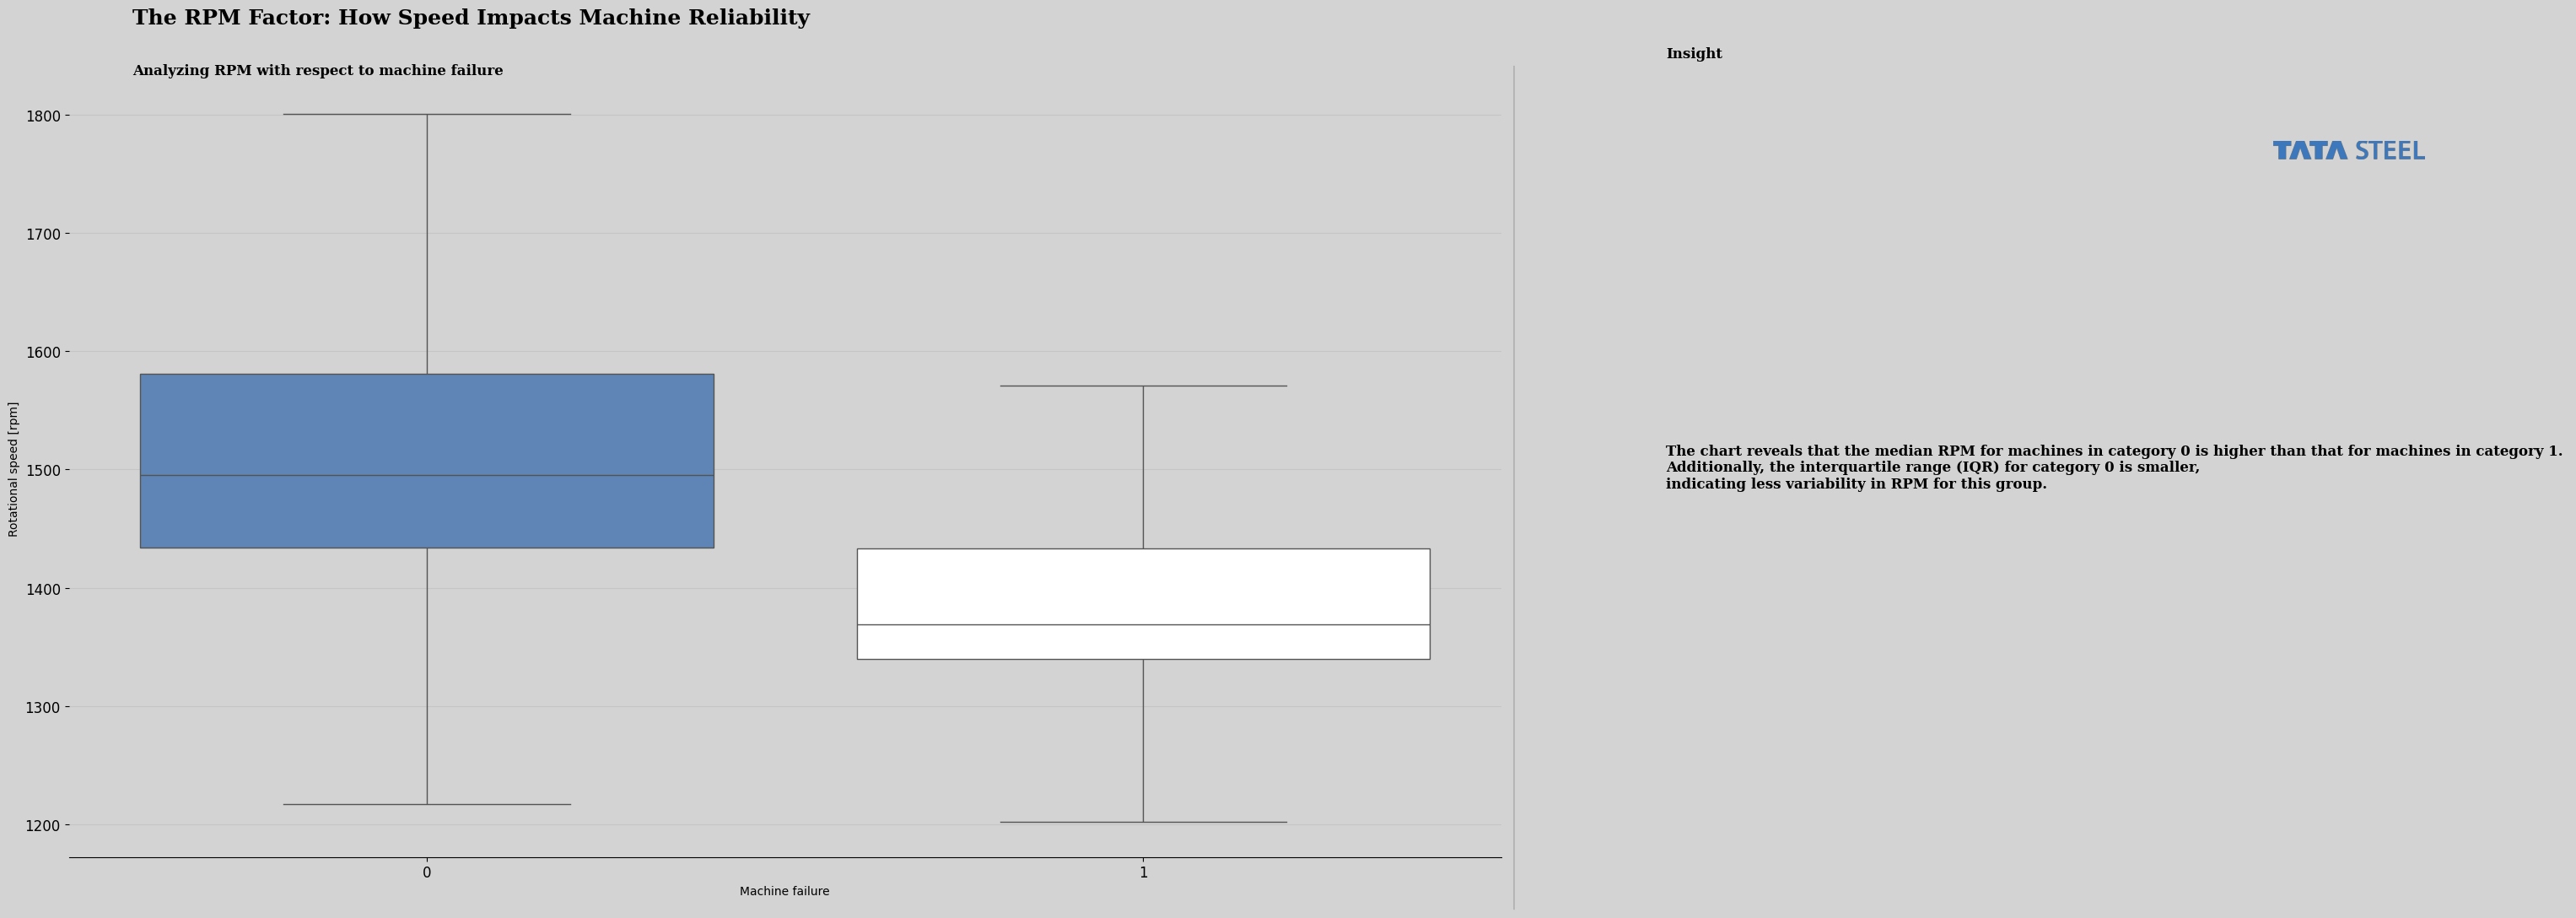

In [388]:
# Chart - 6 visualization code
fig,ax = plt.subplots(1,1,figsize=(18,10))
sns.boxplot(x = 'Machine failure',y = 'Rotational speed [rpm]',data = ts_df,ax = ax ,palette = palette,showfliers = False)
apply_chart_styling(ax = ax, fig = fig, title = 'The RPM Factor: How Speed Impacts Machine Reliability' , subtitle = 'Analyzing RPM with respect to machine failure', insight_text = '''The chart reveals that the median RPM for machines in category 0 is higher than that for machines in category 1. 
Additionally, the interquartile range (IQR) for category 0 is smaller, 
indicating less variability in RPM for this group.''')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A box plot was chosen for this analysis because it effectively compares the distribution of a continuous numerical variable (RPM) across different categories of a categorical variable (machine failure). By visualizing the median, quartiles, and potential outliers for each category, the box plot provides a clear picture of the differences in RPM between the two groups.

##### 2. What is/are the insight(s) found from the chart?

The box plot shows the relationship between machine failure (category 0 or 1) and RPM. The chart reveals that the median RPM for machines in category 0 is higher than that for machines in category 1. Additionally, the interquartile range (IQR) for category 0 is smaller, indicating less variability in RPM for this group.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from this analysis can have a positive business impact in several ways. For example, understanding the relationship between RPM and machine failure can help in identifying potential operational factors that contribute to equipment breakdowns. This information can be used to optimize machine settings, improve maintenance practices, and reduce downtime, leading to increased productivity and cost savings.

#### Chart - 7

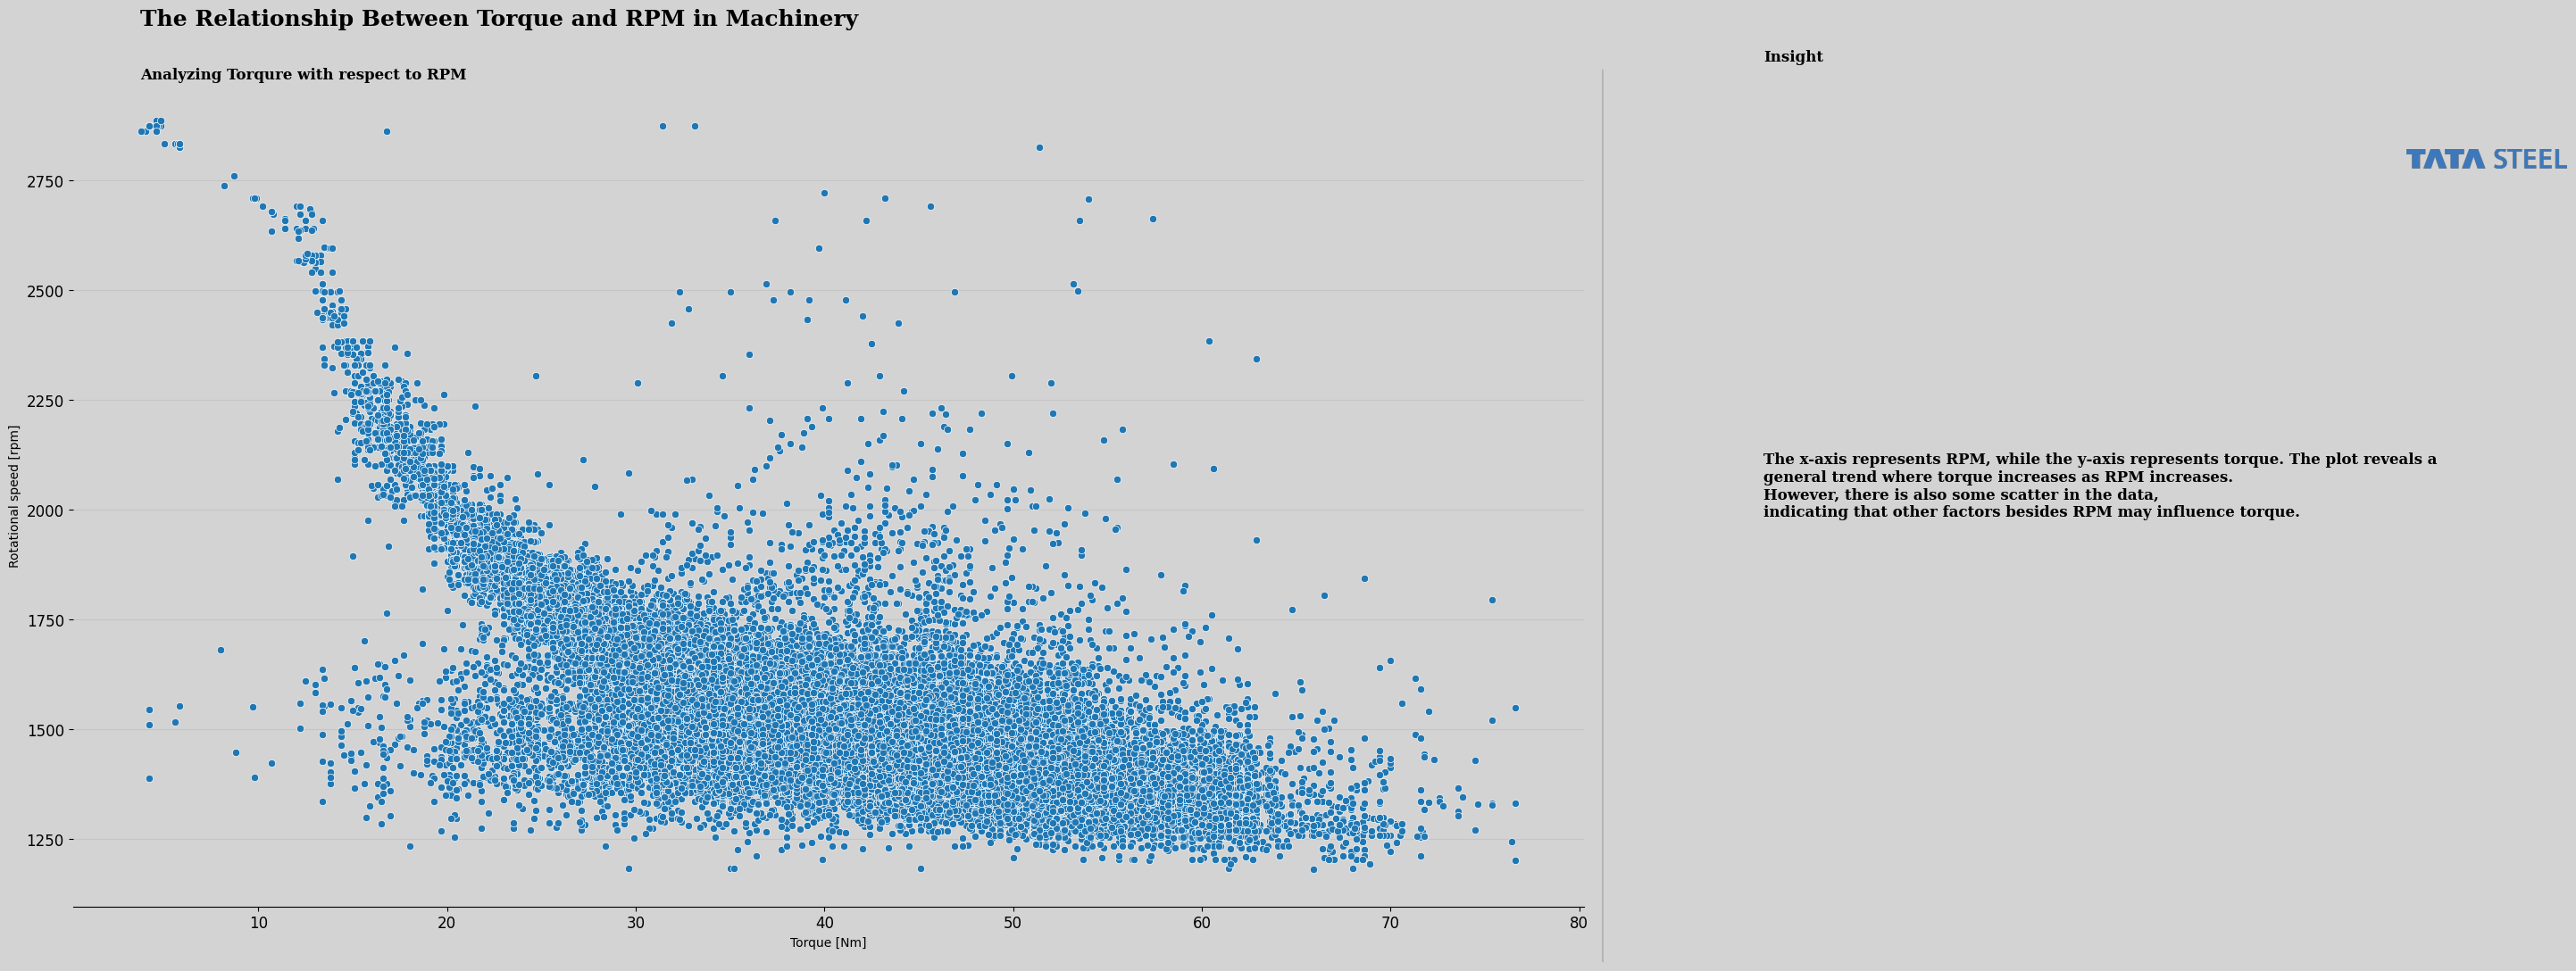

In [396]:
# Chart - 7 visualization code
fig,ax = plt.subplots(1,1,figsize=(18,10))
sns.scatterplot(x ='Torque [Nm]',y = 'Rotational speed [rpm]',data = ts_df,ax = ax ,palette = palette)
apply_chart_styling(ax = ax, fig = fig, title = 'The Relationship Between Torque and RPM in Machinery' , subtitle = 'Analyzing Torqure with respect to RPM', insight_text = '''The x-axis represents RPM, while the y-axis represents torque. The plot reveals a 
general trend where torque increases as RPM increases. 
However, there is also some scatter in the data, 
indicating that other factors besides RPM may influence torque.''')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A scatter plot was chosen for this analysis because it effectively visualizes the relationship between two continuous numerical variables like torque and RPM. By plotting each data point as a dot, the scatter plot provides a clear picture of the correlation between the two variables.

##### 2. What is/are the insight(s) found from the chart?

The scatter plot shows the relationship between torque and RPM. The x-axis represents RPM, while the y-axis represents torque. The plot reveals a general trend where torque increases as RPM increases. However, there is also some scatter in the data, indicating that other factors besides RPM may influence torque.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from this analysis can have a positive business impact in several ways. For example, understanding the relationship between torque and RPM can help in optimizing machine performance and reducing energy consumption. By identifying the optimal operating range for torque and RPM, businesses can improve efficiency and reduce costs. Additionally, the scatter plot can help in identifying any abnormal trends or outliers that may indicate equipment malfunctions or operational issues. This information can be used to schedule preventive maintenance and prevent costly breakdowns.

#### Chart - 8

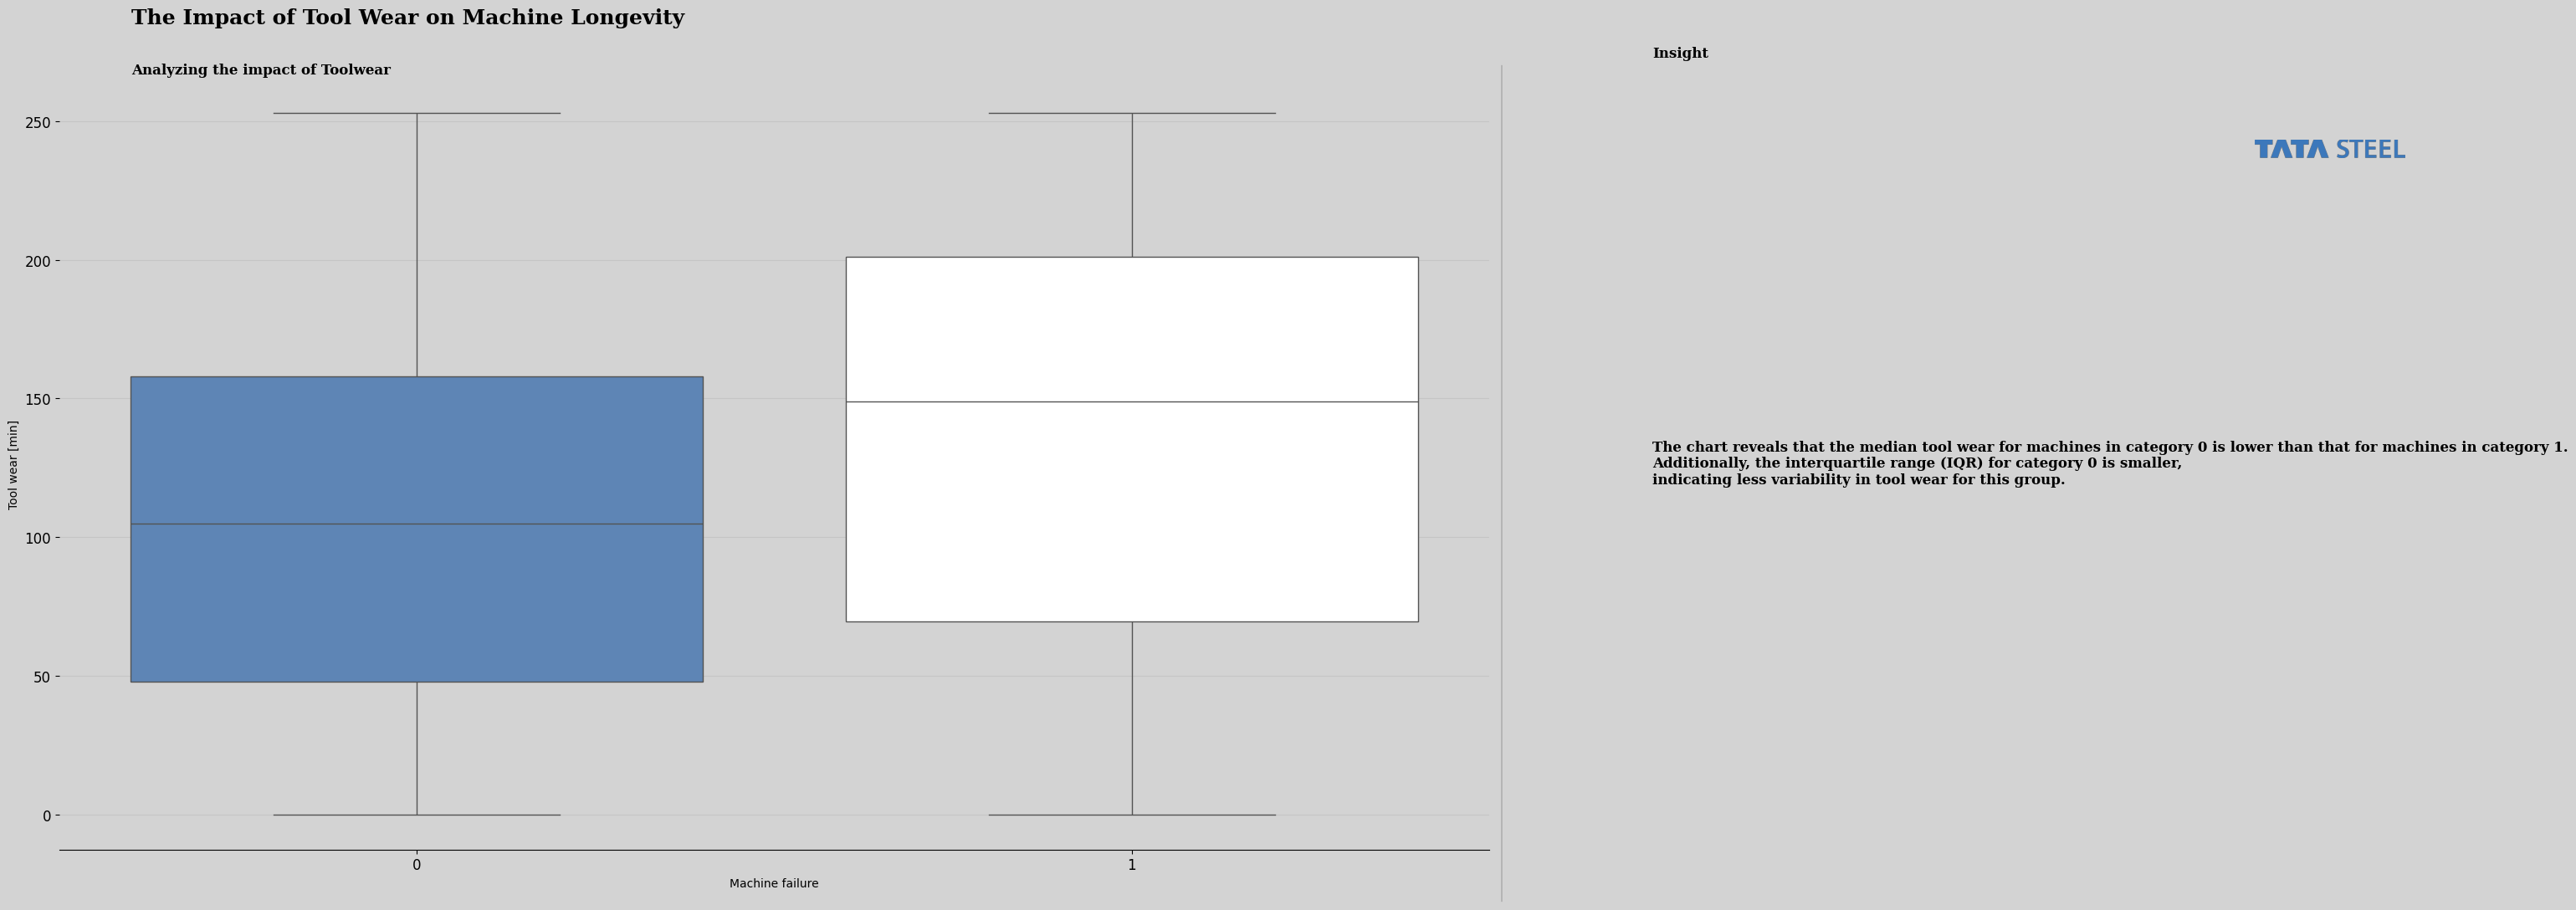

In [404]:
# Chart - 8 visualization code
fig,ax = plt.subplots(1,1,figsize=(18,10))
sns.boxplot(x = 'Machine failure',y = 'Tool wear [min]',data = ts_df,ax = ax ,palette = palette,showfliers = False)
apply_chart_styling(ax = ax, fig = fig, title = 'The Impact of Tool Wear on Machine Longevity' , subtitle = 'Analyzing the impact of Toolwear', insight_text = '''The chart reveals that the median tool wear for machines in category 0 is lower than that for machines in category 1.
Additionally, the interquartile range (IQR) for category 0 is smaller, 
indicating less variability in tool wear for this group.''')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A box plot was chosen for this analysis because it effectively compares the distribution of a continuous numerical variable (tool wear) across different categories of a categorical variable (machine failure). By visualizing the median, quartiles, and potential outliers for each category, the box plot provides a clear picture of the differences in tool wear between the two groups.

##### 2. What is/are the insight(s) found from the chart?

The box plot shows the relationship between tool wear and machine failure. The chart reveals that the median tool wear for machines in category 0 is lower than that for machines in category 1. Additionally, the interquartile range (IQR) for category 0 is smaller, indicating less variability in tool wear for this group.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from this analysis can have a positive business impact in several ways. For example, understanding the relationship between tool wear and machine failure can help in identifying potential factors that contribute to equipment breakdowns. This information can be used to optimize maintenance schedules, improve equipment reliability, and reduce downtime, leading to increased productivity and cost savings.

#### Chart - 9

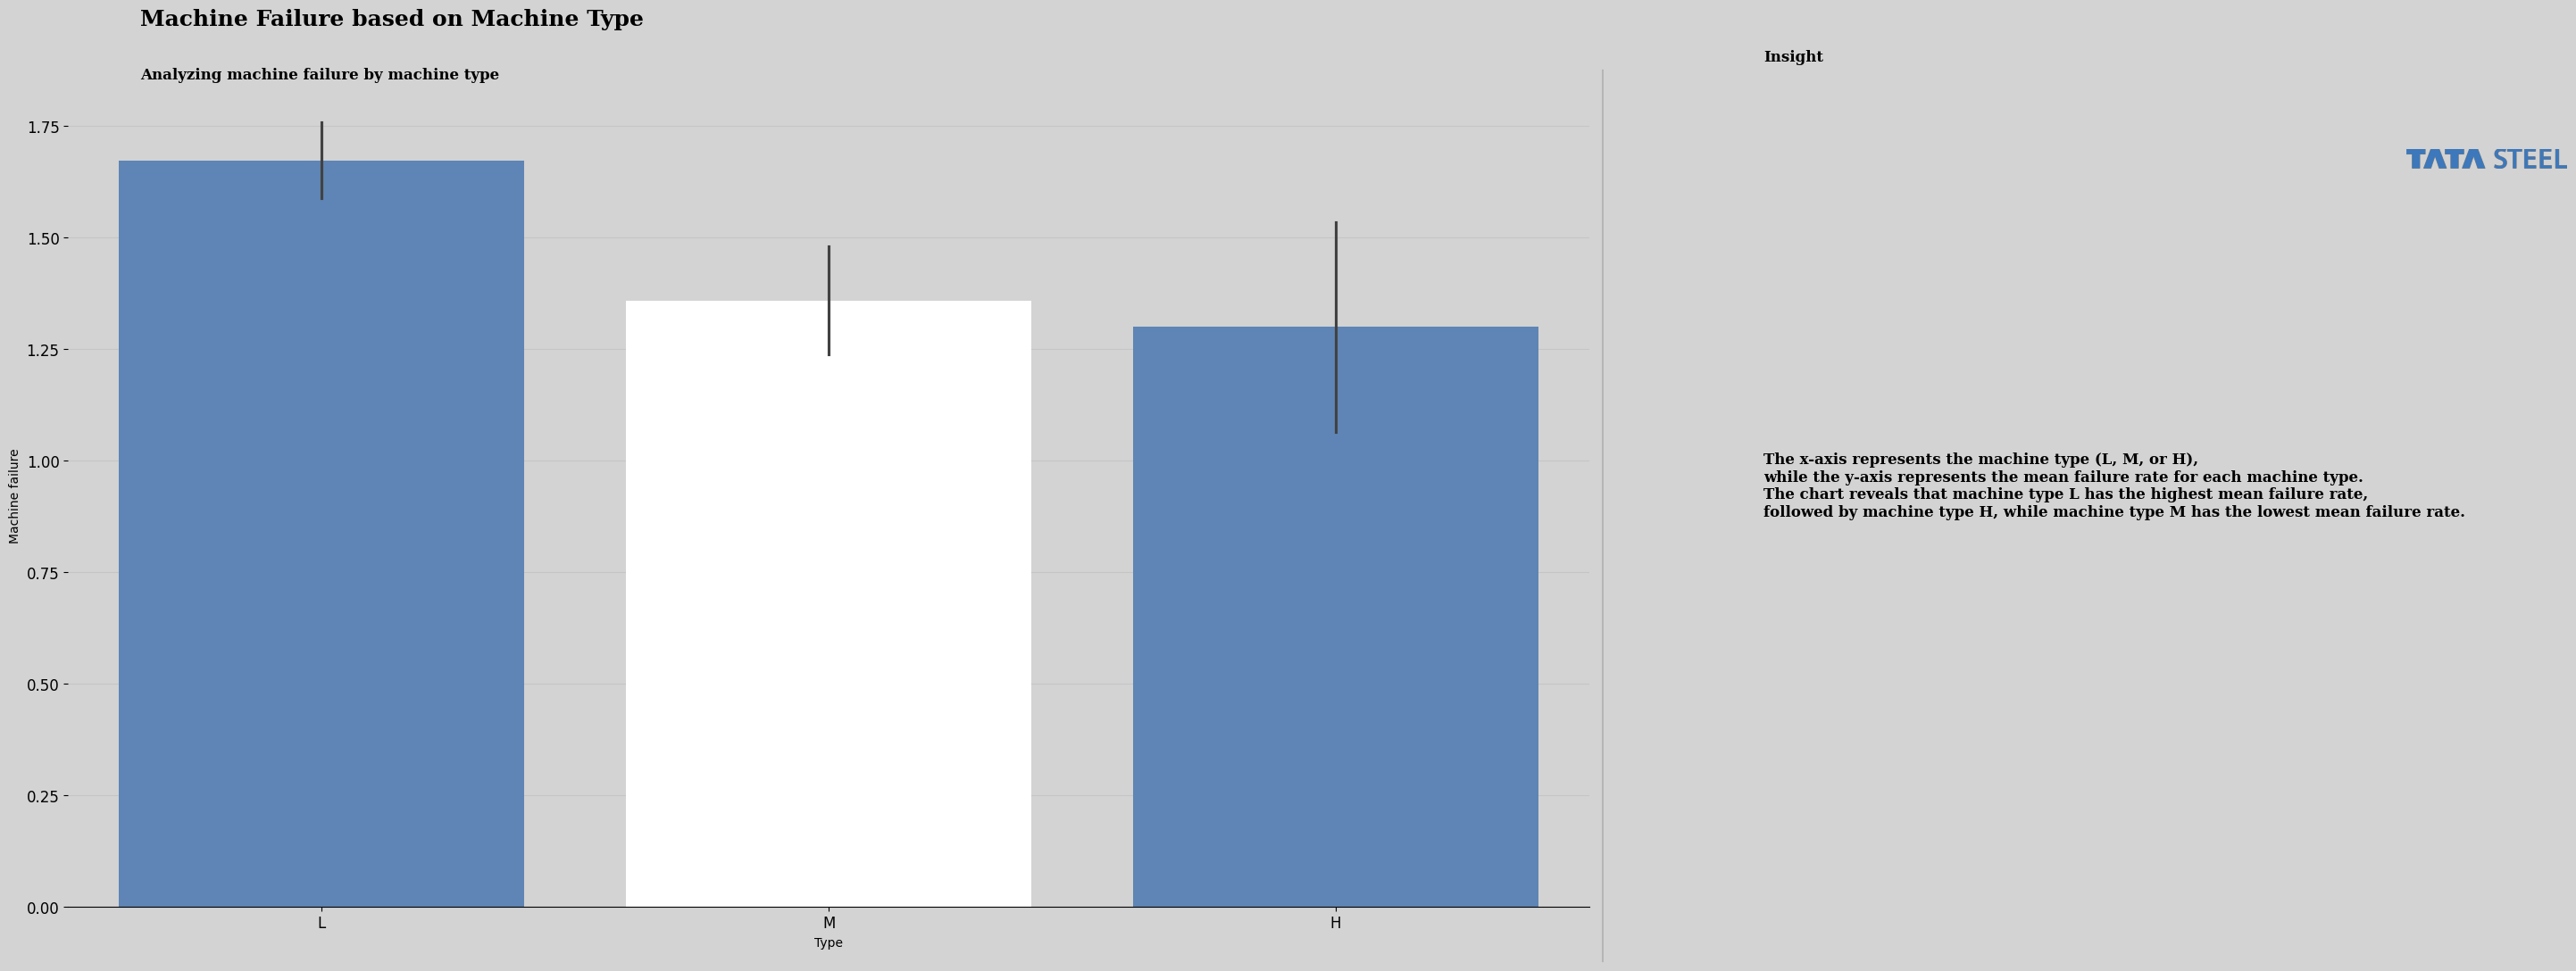

In [412]:
# Chart - 9 visualization code
pct_machine_failure = ts_df['Machine failure'] * 100
fig,ax = plt.subplots(1,1,figsize=(18,10))
sns.barplot(x ='Type',y = pct_machine_failure,data = ts_df,ax = ax ,palette = palette)
apply_chart_styling(ax = ax, fig = fig, title = 'Machine Failure based on Machine Type' , subtitle = 'Analyzing machine failure by machine type', insight_text = '''The x-axis represents the machine type (L, M, or H), 
while the y-axis represents the mean failure rate for each machine type. 
The chart reveals that machine type L has the highest mean failure rate, 
followed by machine type H, while machine type M has the lowest mean failure rate.''')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart was chosen for this analysis because it effectively compares the average values of a continuous numerical variable (failure rate) across different categories of a categorical variable (machine type). By representing each category with a bar, the bar chart provides a clear picture of the differences in failure rates between the three machine types.

##### 2. What is/are the insight(s) found from the chart?

The bar chart shows the relationship between machine failure and machine type. The x-axis represents the machine type (L, M, or H), while the y-axis represents the mean failure rate for each machine type. The chart reveals that machine type L has the highest mean failure rate, followed by machine type H, while machine type M has the lowest mean failure rate.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from this analysis can have a positive business impact in several ways. For example, understanding the relationship between machine type and failure rate can help in identifying the root causes of equipment breakdowns. This information can be used to optimize maintenance schedules, improve equipment reliability, and reduce downtime, leading to increased productivity and cost savings. Additionally, the bar chart can help in identifying machine types that are more prone to failure, allowing for targeted maintenance and replacement strategies.










#### Chart - 10

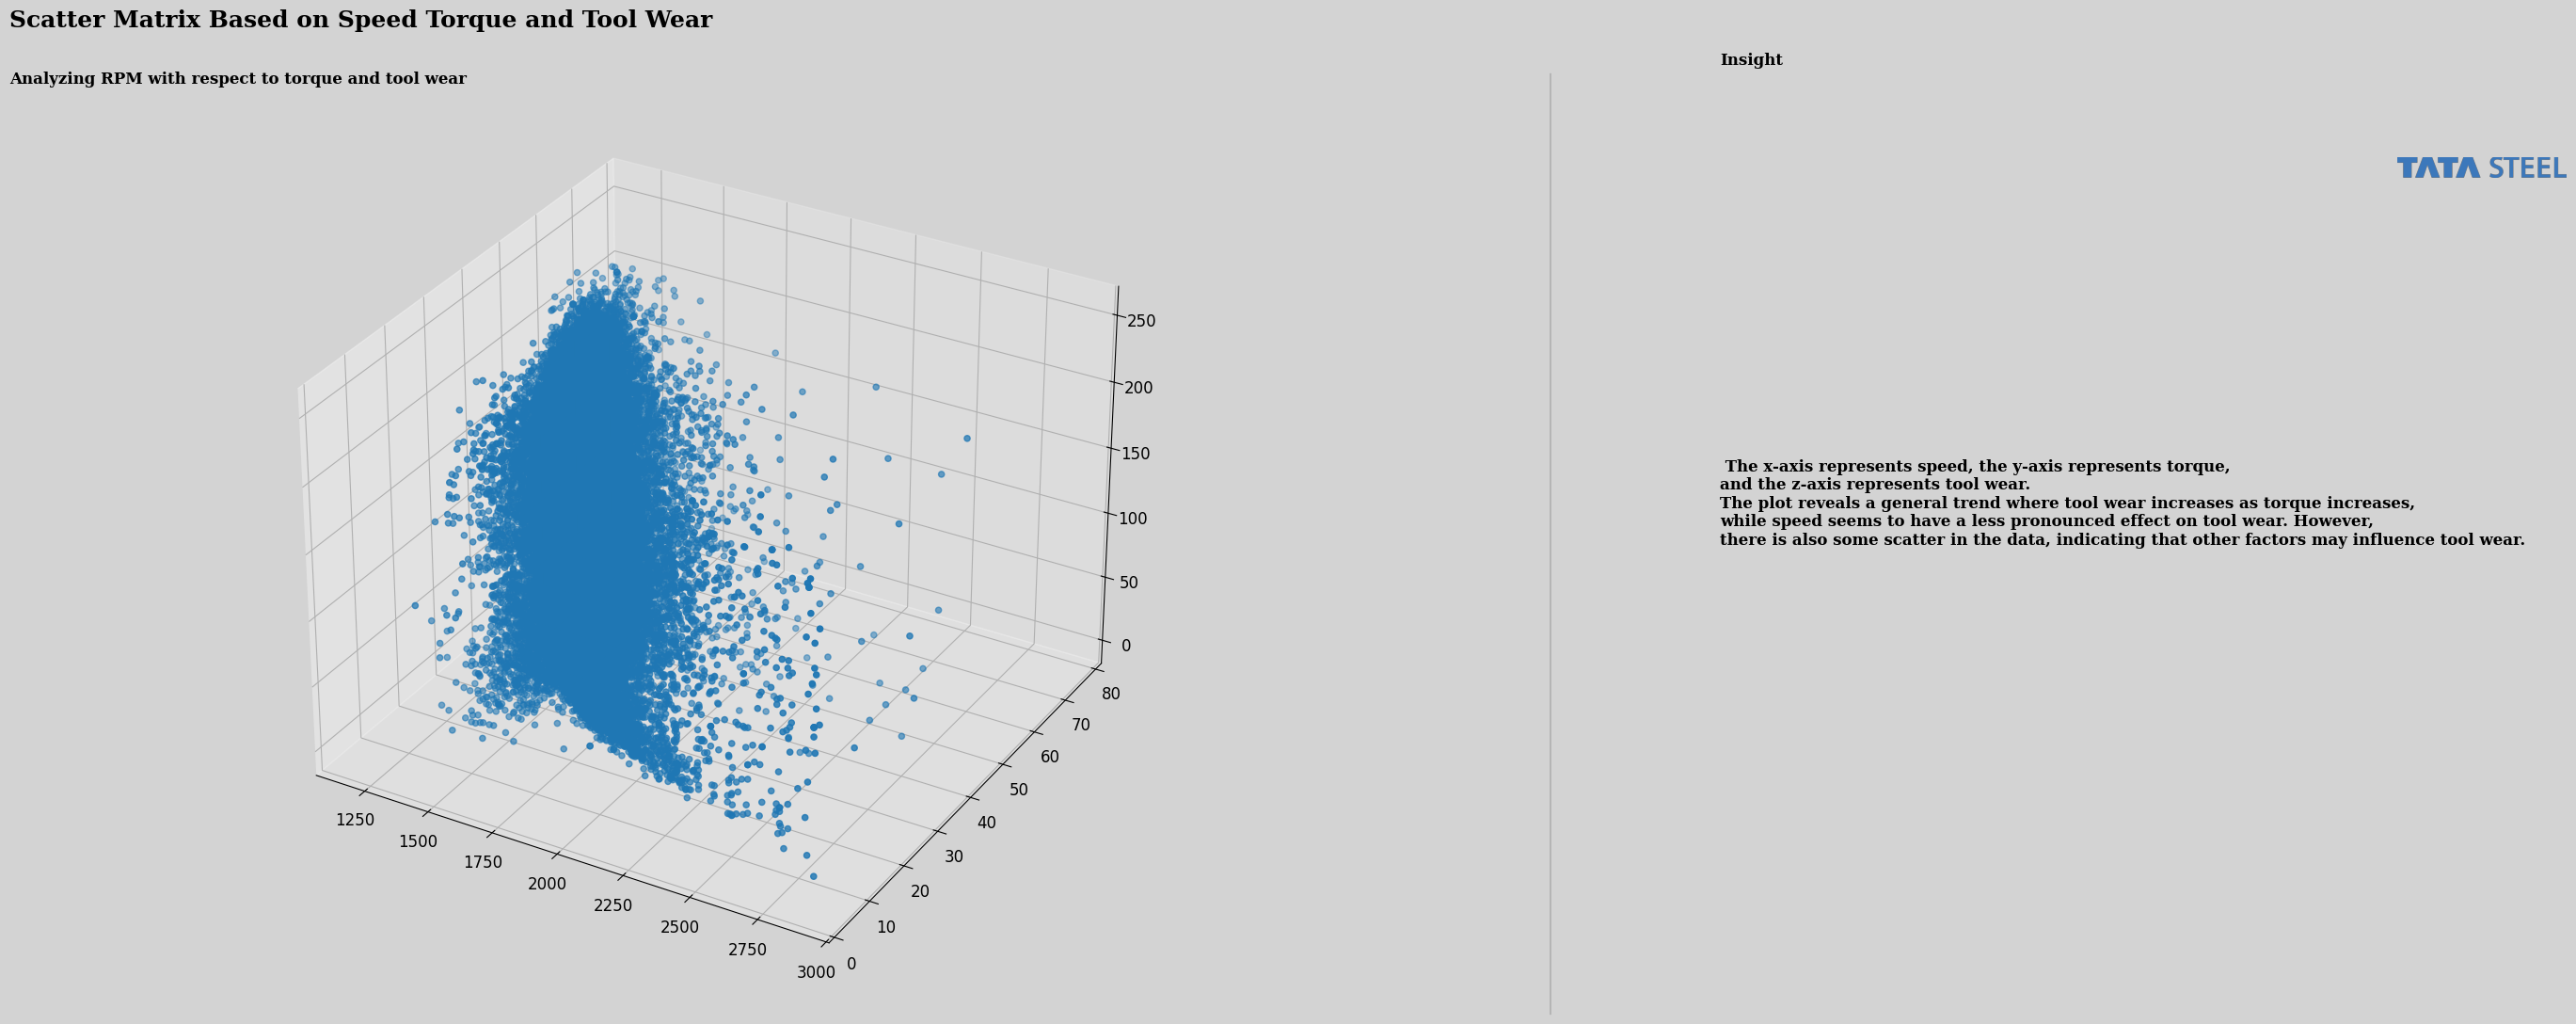

In [420]:
# Chart - 10 visualization code
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(18, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(ts_df['Rotational speed [rpm]'], ts_df['Torque [Nm]'], ts_df['Tool wear [min]'])
apply_chart_styling(ax = ax, fig = fig, title = 'Scatter Matrix Based on Speed Torque and Tool Wear' , subtitle = 'Analyzing RPM with respect to torque and tool wear', insight_text = ''' The x-axis represents speed, the y-axis represents torque, 
and the z-axis represents tool wear. 
The plot reveals a general trend where tool wear increases as torque increases, 
while speed seems to have a less pronounced effect on tool wear. However, 
there is also some scatter in the data, indicating that other factors may influence tool wear.''')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A 3D scatter plot was chosen for this analysis because it effectively visualizes the relationships between three continuous numerical variables like speed, torque, and tool wear. By plotting each data point as a dot in three-dimensional space, the scatter plot provides a clear picture of the correlations between the variables.

##### 2. What is/are the insight(s) found from the chart?

The 3D scatter plot shows the relationships between speed, torque, and tool wear. The x-axis represents speed, the y-axis represents torque, and the z-axis represents tool wear. The plot reveals a general trend where tool wear increases as torque increases, while speed seems to have a less pronounced effect on tool wear. However, there is also some scatter in the data, indicating that other factors may influence tool wear.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from this analysis can have a positive business impact in several ways. For example, understanding the relationships between speed, torque, and tool wear can help in optimizing machine settings and reducing tool wear. By identifying the optimal operating conditions, businesses can improve equipment efficiency, reduce maintenance costs, and increase productivity. Additionally, the scatter plot can help in identifying any abnormal trends or outliers that may indicate equipment malfunctions or operational issues. This information can be used to schedule preventive maintenance and prevent costly breakdowns.

#### Chart - 11

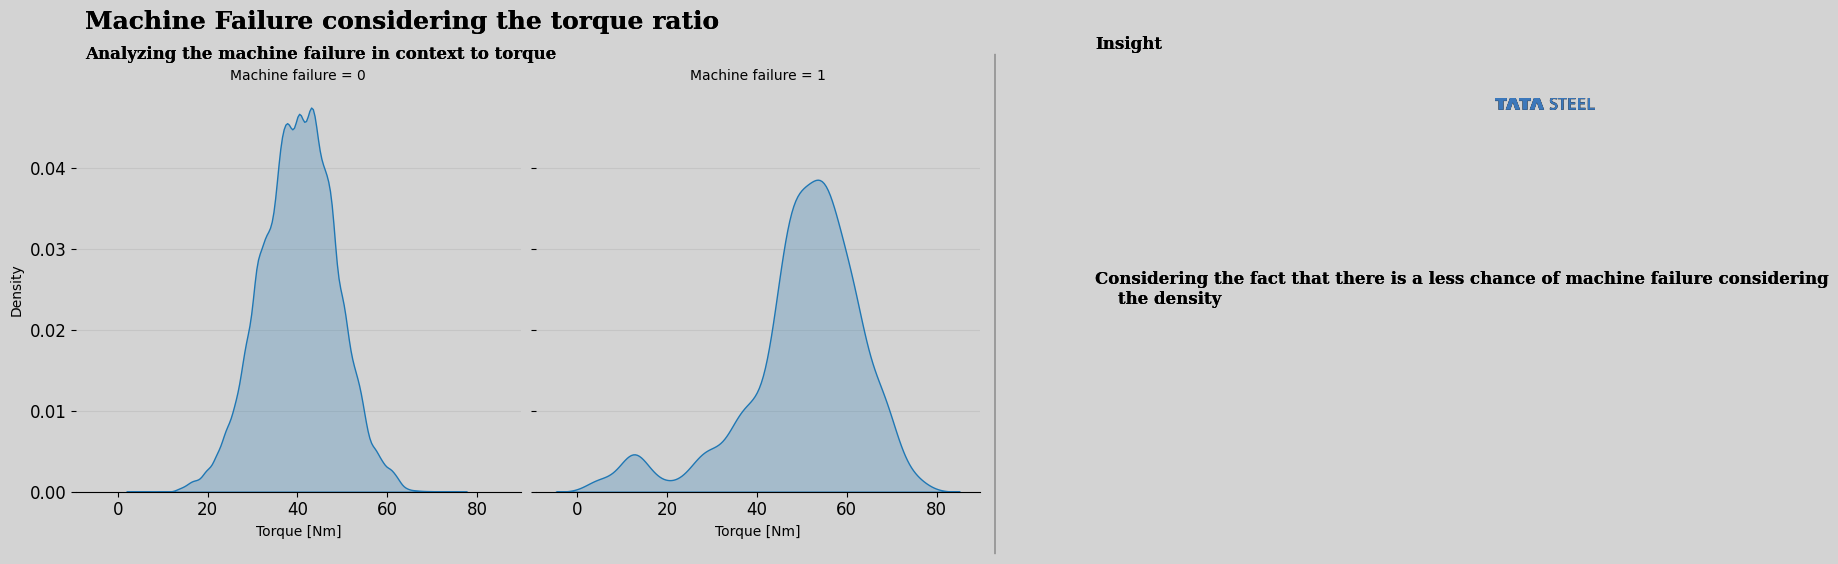

In [428]:
# Chart - 11 visualization code
g = sns.FacetGrid(ts_df, col='Machine failure', height=5)
g.map(sns.kdeplot, 'Torque [Nm]', fill=True)

# Apply styling to each axis in the FacetGrid
for ax in g.axes.flat:
    apply_chart_styling(ax=ax, fig=g.fig, title='Machine Failure considering the torque ratio', subtitle='Analyzing the machine failure in context to torque', insight_text='''Considering the fact that there is a less chance of machine failure considering
    the density''')

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Density plots comparing the torque distribution for machines that have failed (Machine Failure = 1) and those that have not (Machine Failure = 0).

##### 2. What is/are the insight(s) found from the chart?

The density plot for machines that have failed shows a bimodal distribution, with two peaks around 20 Nm and 60 Nm. This suggests that there might be two distinct groups of machines that fail at different torque levels.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from this analysis can help in identifying potential factors that contribute to machine failures. For example, machines that operate at the peak torque levels identified in the failed machines' distribution might be more prone to breakdowns. This information can be used to optimize machine settings, improve maintenance practices, and reduce downtime, leading to increased productivity and cost savings.

#### Chart - 12

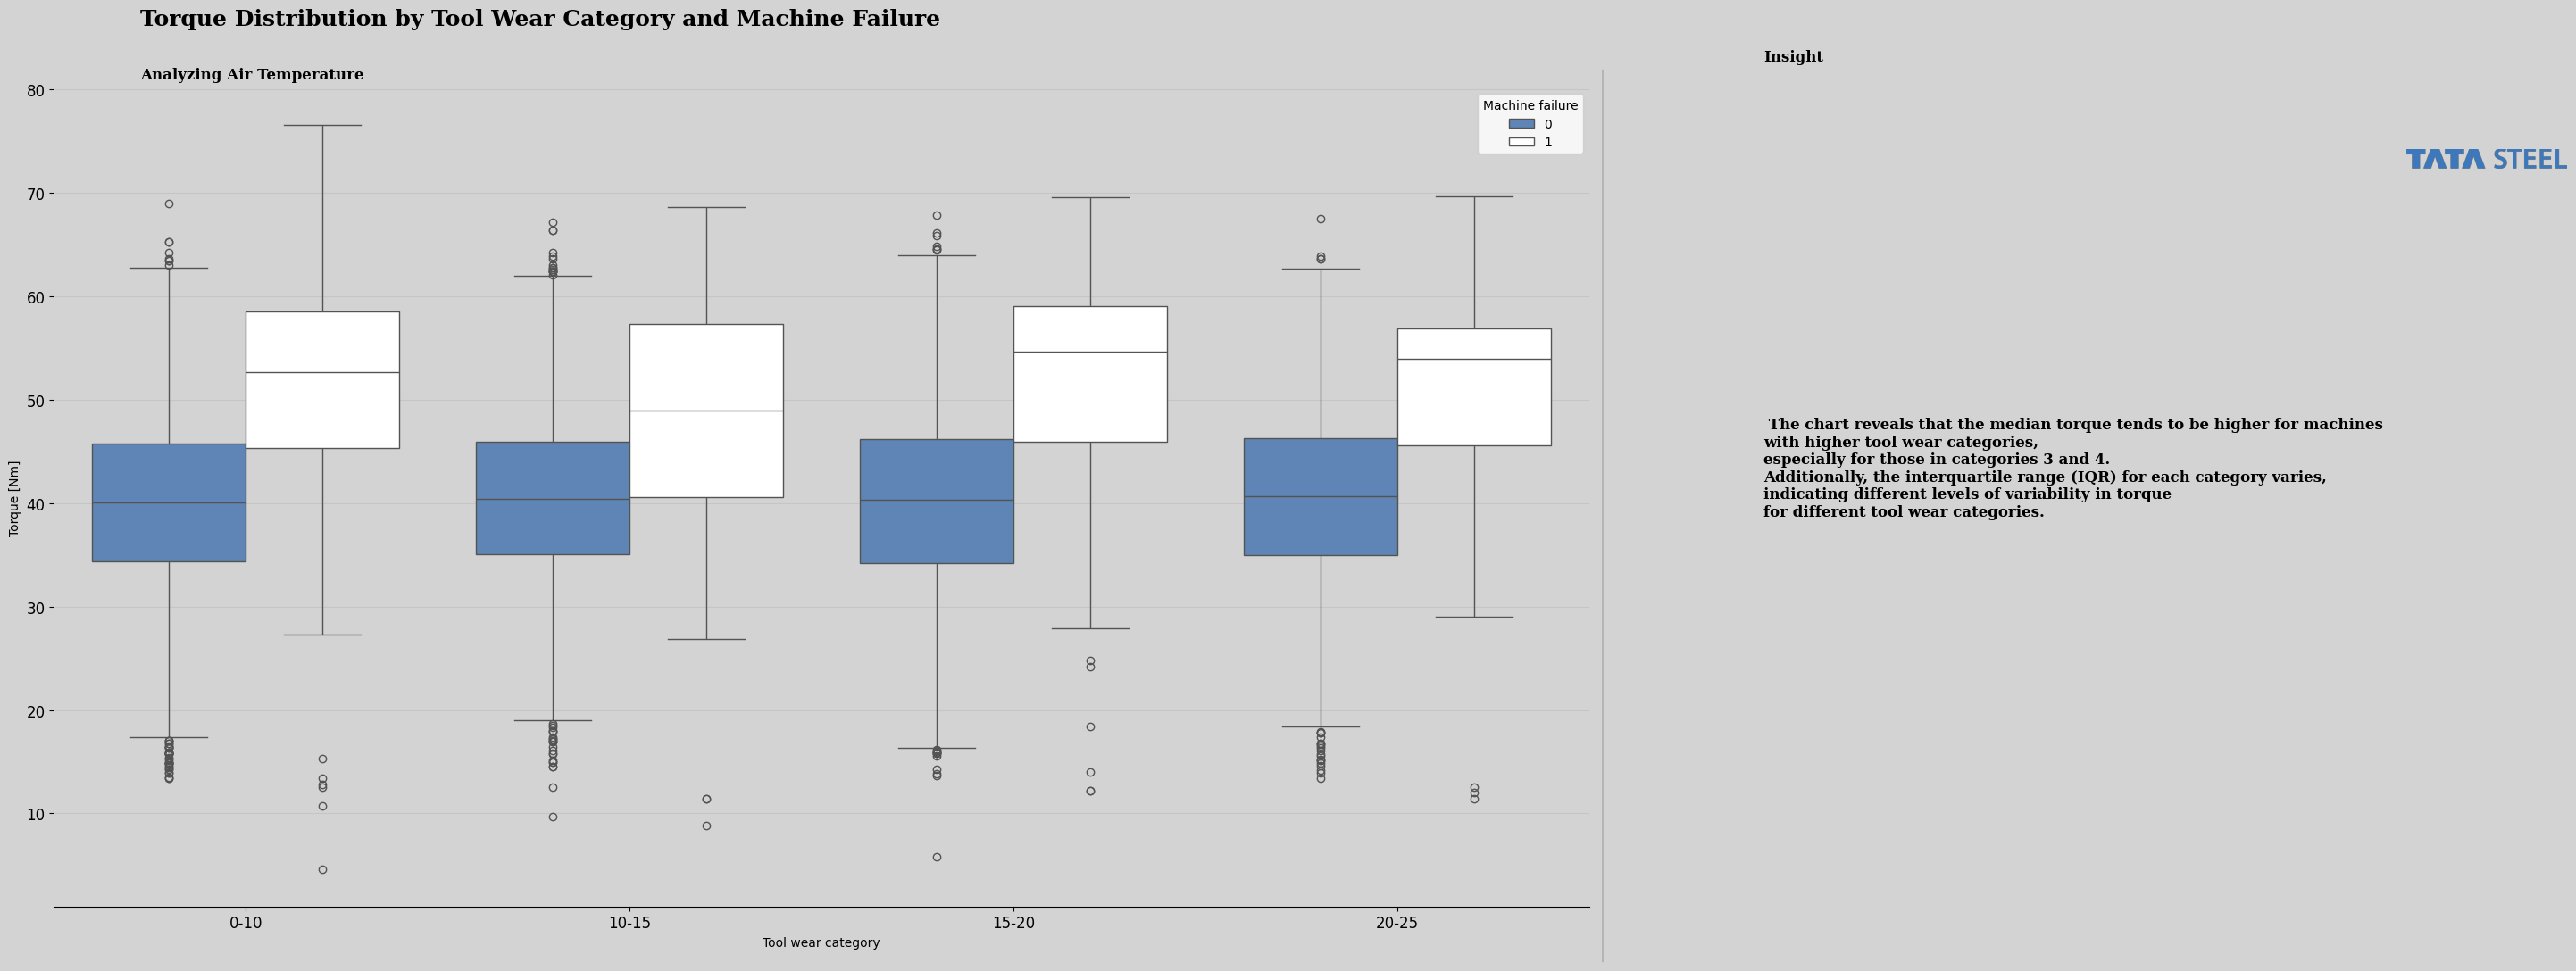

In [436]:
# Define bins and labels for tool wear
bins = [0, 10, 15, 20, 25]  # Define bins for tool wear
labels = ['0-10', '10-15', '15-20', '20-25']
ts_df['Tool wear category'] = pd.cut(ts_df['Tool wear [min]'], bins=bins, labels=labels)

# Create box plot
fig, ax = plt.subplots(1, 1, figsize=(18, 10))  # Use plt.subplots() instead of plt.subplot()
sns.boxplot(x='Tool wear category', y='Torque [Nm]', hue='Machine failure', data=ts_df, palette=palette)

# Apply chart styling
apply_chart_styling(ax=ax, fig=fig, title='Torque Distribution by Tool Wear Category and Machine Failure', subtitle='Analyzing Air Temperature', insight_text=''' The chart reveals that the median torque tends to be higher for machines 
with higher tool wear categories, 
especially for those in categories 3 and 4. 
Additionally, the interquartile range (IQR) for each category varies, 
indicating different levels of variability in torque 
for different tool wear categories.''')

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A box plot was chosen for this analysis because it effectively compares the distribution of a continuous numerical variable (torque) across different categories of a categorical variable (tool wear category). By visualizing the median, quartiles, and potential outliers for each category, the box plot provides a clear picture of the differences in torque between the four groups.

##### 2. What is/are the insight(s) found from the chart?

The box plot shows the relationship between torque, tool wear category, and machine failure. The x-axis represents the tool wear category (1, 2, 3, or 4), while the y-axis represents torque. The chart reveals that the median torque tends to be higher for machines with higher tool wear categories, especially for those in categories 3 and 4. Additionally, the interquartile range (IQR) for each category varies, indicating different levels of variability in torque for different tool wear categories.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from this analysis can have a positive business impact in several ways. For example, understanding the relationship between torque, tool wear category, and machine failure can help in identifying potential factors that contribute to equipment breakdowns. This information can be used to optimize maintenance schedules, improve equipment reliability, and reduce downtime, leading to increased productivity and cost savings. Additionally, the box plot can help in identifying tool wear categories that are more likely to lead to machine failure, allowing for targeted maintenance and replacement strategies.

#### Chart - 13

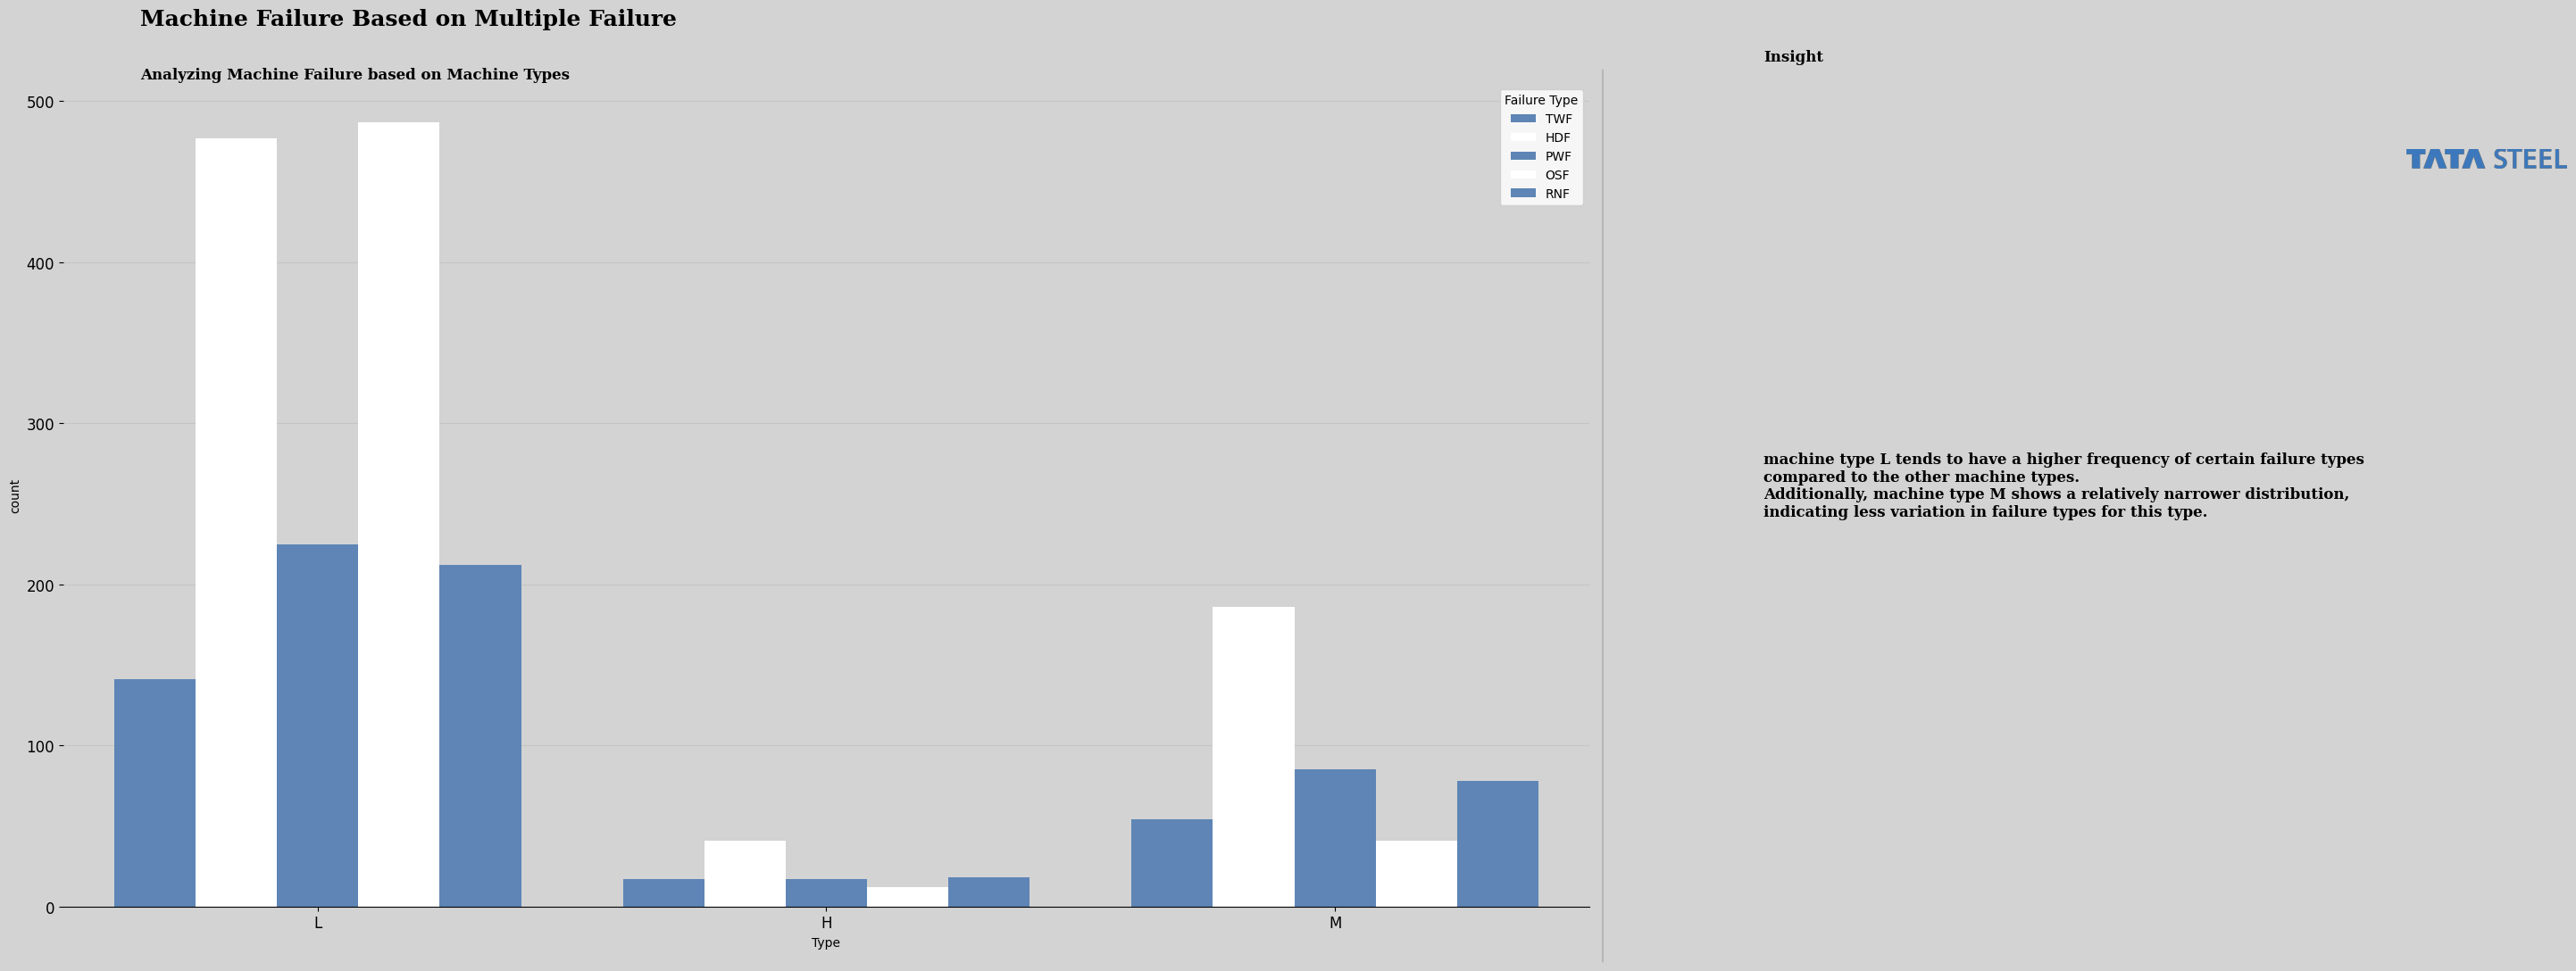

In [444]:
# Chart - 13 visualization code
failure_columns = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']
failure_category = ts_df.melt(id_vars='Type', value_vars=failure_columns, var_name='Failure Type', value_name='Failure Occurred')


failure_category = failure_category[failure_category['Failure Occurred'] == 1]

# Create the plot
fig, ax = plt.subplots(1, 1, figsize=(18, 10))
sns.countplot(x='Type', hue='Failure Type', data=failure_category, ax=ax, palette=palette)

# Apply chart styling
apply_chart_styling(ax=ax, fig=fig, title='Machine Failure Based on Multiple Failure', subtitle='Analyzing Machine Failure based on Machine Types', insight_text='''machine type L tends to have a higher frequency of certain failure types 
compared to the other machine types. 
Additionally, machine type M shows a relatively narrower distribution, 
indicating less variation in failure types for this type.''')

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

The bar chart was used for this distribution of machine failure types categorized by machine type. The x-axis represents the machine type (L, M, or H), while the y-axis represents the frequency of occurrence of each failure type within that machine type.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals that the distribution of machine failure types varies across different machine types. For example, machine type L tends to have a higher frequency of certain failure types compared to the other machine types. Additionally, machine type M shows a relatively narrower distribution, indicating less variation in failure types for this type.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from this analysis can have a positive business impact in several ways. For example, understanding the typical types of failures that occur in each machine type can help in identifying potential design flaws or operating conditions that contribute to these failures. This information can be used to optimize maintenance schedules, improve equipment reliability, and reduce downtime, leading to increased productivity and cost savings.

#### Chart - 14 - Correlation Heatmap

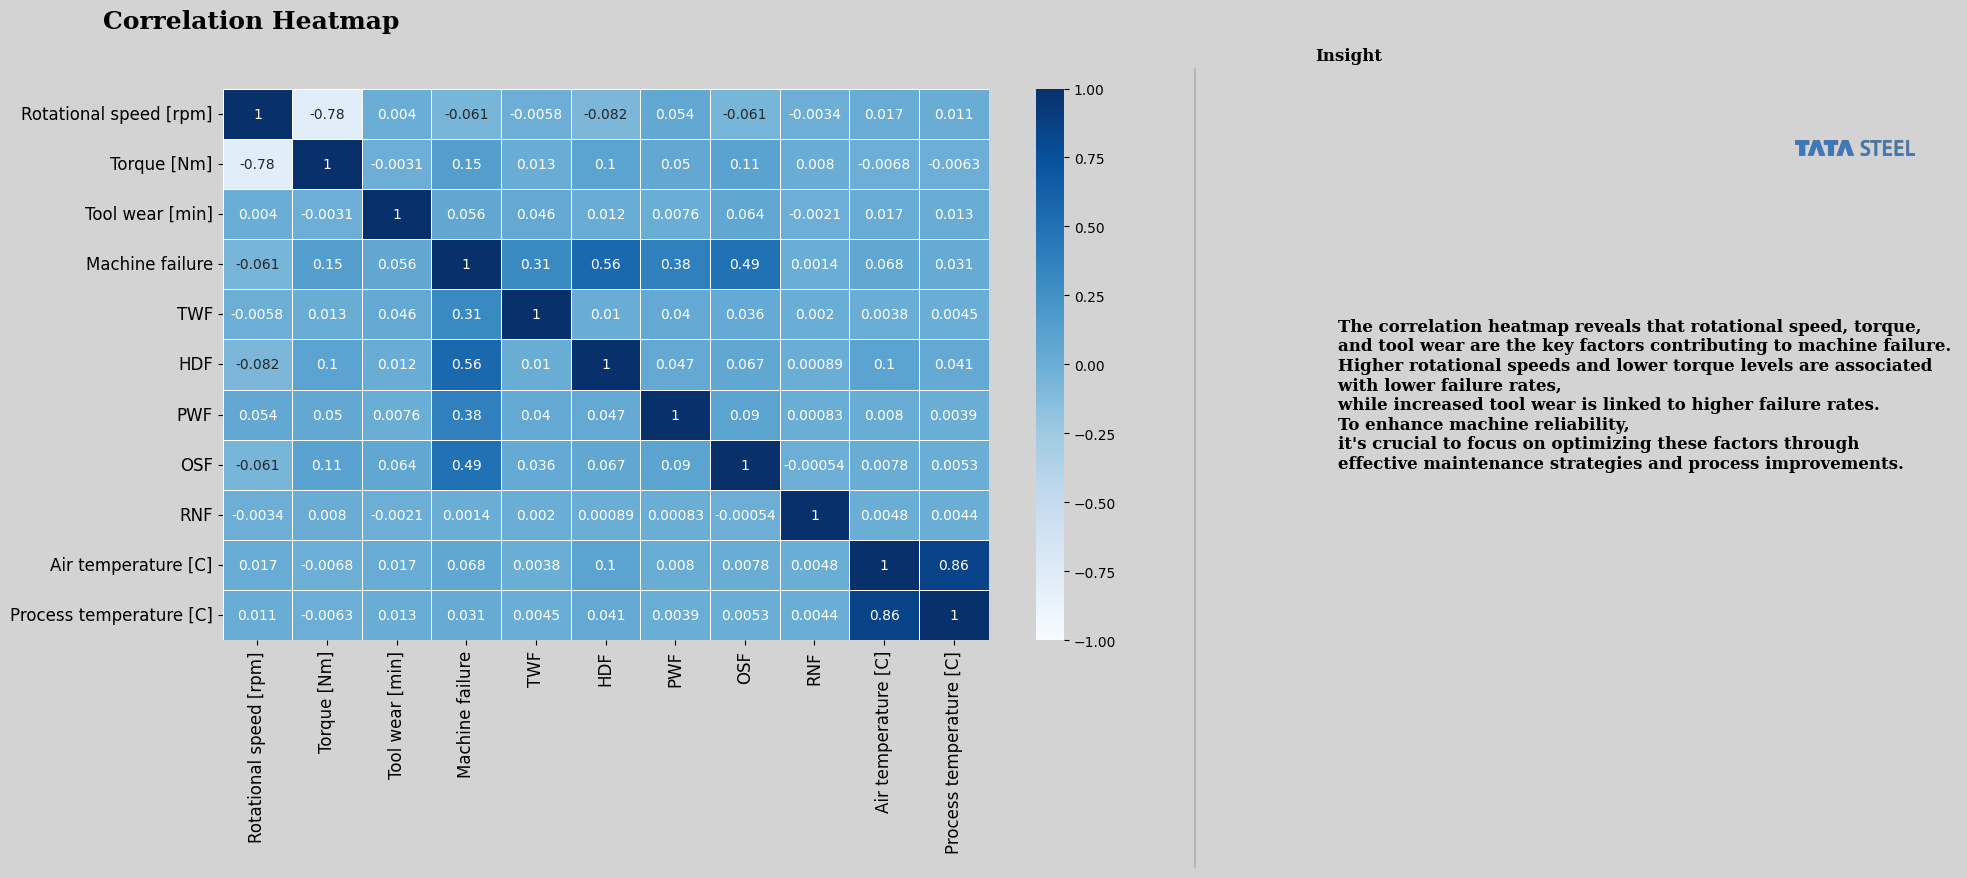

In [486]:
# Correlation Heatmap visualization code
corr_df = ts_df[['Rotational speed [rpm]','Torque [Nm]','Tool wear [min]','Machine failure','TWF','HDF','PWF','OSF','RNF','Air temperature [C]','Process temperature [C]']]

fig,ax = plt.subplots(1,1,figsize = (12,8))
corr_matrix = corr_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='Blues', vmin=-1, vmax=1, linewidths=0.5, ax=ax, annot_kws={"size": 10})

apply_chart_styling(
    fig=fig,
    ax=ax,
    title='Correlation Heatmap',
    subtitle='',
    insight_text='''
    The correlation heatmap reveals that rotational speed, torque, 
    and tool wear are the key factors contributing to machine failure. 
    Higher rotational speeds and lower torque levels are associated 
    with lower failure rates, 
    while increased tool wear is linked to higher failure rates. 
    To enhance machine reliability, 
    it's crucial to focus on optimizing these factors through 
    effective maintenance strategies and process improvements.'''
)

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

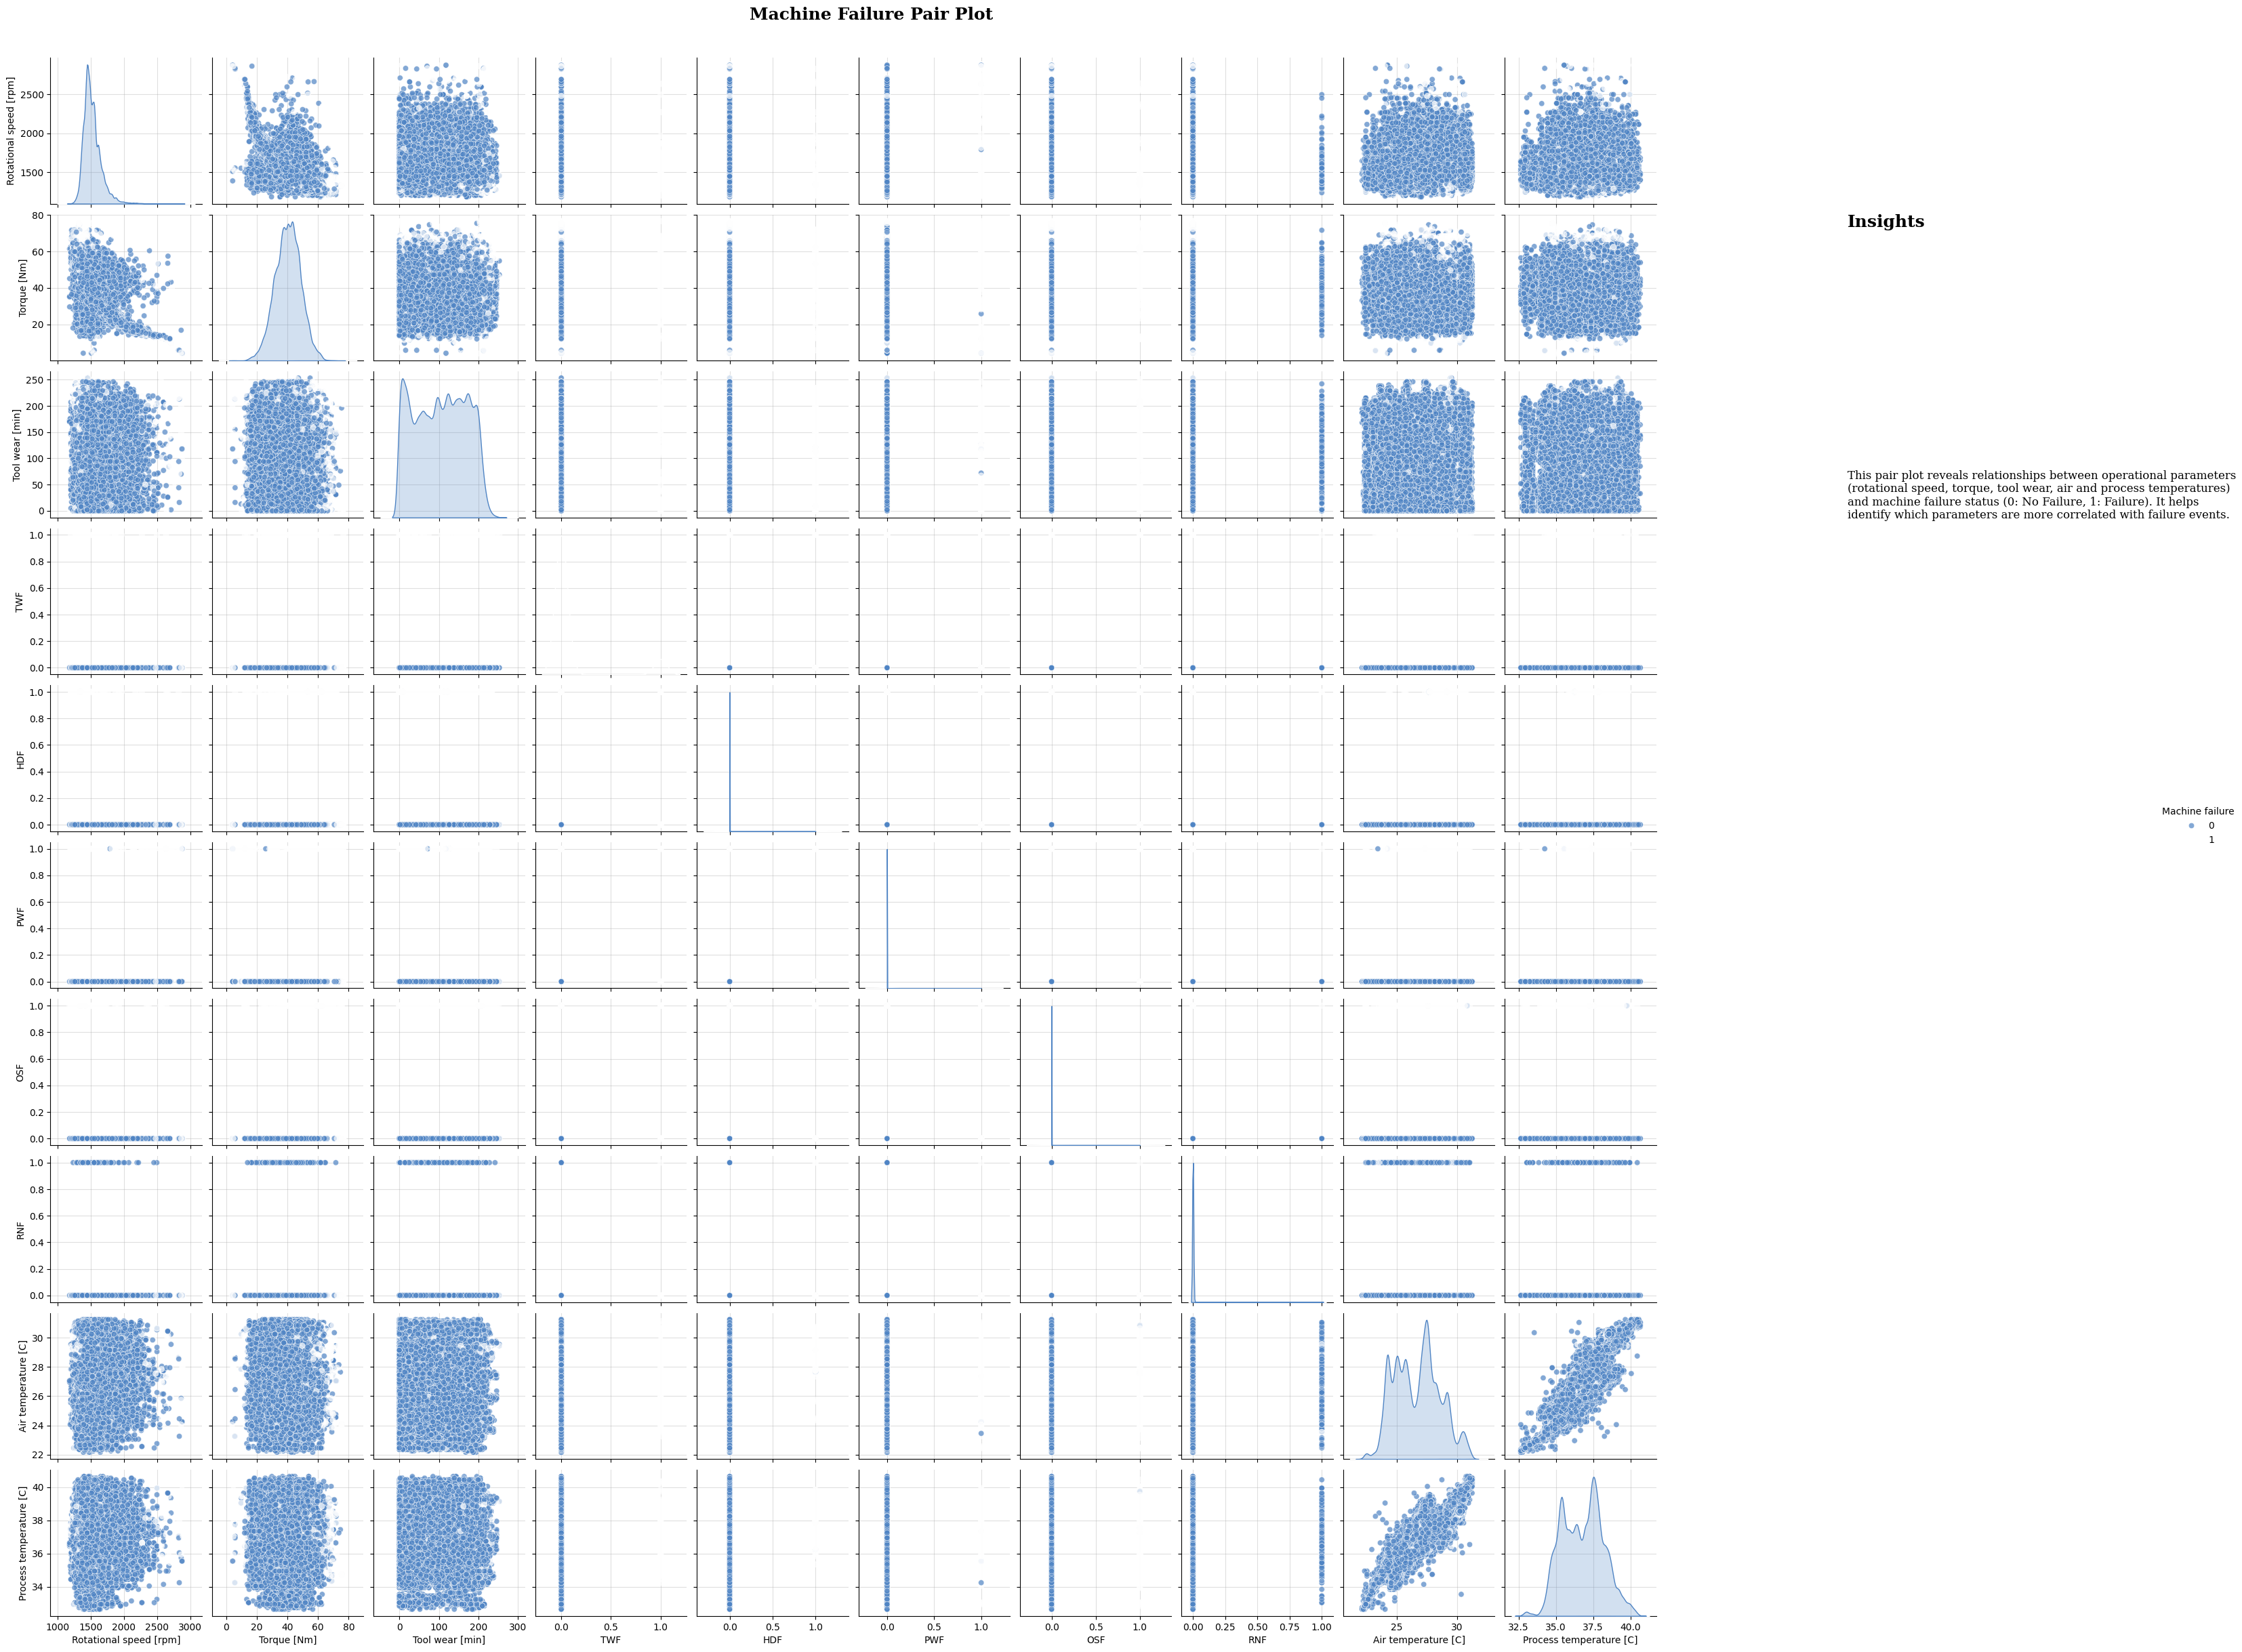

In [154]:
palette = ['#4F84C4', '#FFFFFF']


columns = ['Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 
           'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF', 
           'Air temperature [C]', 'Process temperature [C]']


fig = sns.pairplot(
    ts_df[columns], 
    hue='Machine failure', 
    palette=palette, 
    diag_kind='kde',  
    plot_kws={'alpha': 0.7}  
)


for ax in fig.axes.flatten():
    ax.set_facecolor('#FFFFFF')  # Set white background
    ax.grid(axis='both', linestyle='-', alpha=0.4)  # Light grid
    ax.set_axisbelow(True)  # Gridlines below


fig.fig.suptitle('Machine Failure Pair Plot', fontsize=18, fontweight='bold', fontfamily='serif')
fig.fig.subplots_adjust(top=0.95)


fig.fig.text(1.05, 0.85, 'Insights', fontsize=18, fontweight='bold', fontfamily='serif')
fig.fig.text(1.05, 0.67, '''
This pair plot reveals relationships between operational parameters
(rotational speed, torque, tool wear, air and process temperatures)
and machine failure status (0: No Failure, 1: Failure). It helps
identify which parameters are more correlated with failure events.
''', fontsize=12, fontfamily='serif')


plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Based on the hypothesis tests, we can conclude that there is a significant difference in torque between failed and non-failed machines, with a p-value of 3.42 indicating a strong likelihood that torque levels influence machine failure. Additionally, a Chi-Square test revealed a very strong association between machine failure and the TWF failure type, with a p-value of 0.0, suggesting that TWF is a critical factor in machine failures. Conversely, the ANOVA test showed no significant difference in rotational speed between machine types L and M, as indicated by a p-value of 0.753, suggesting that rotational speed does not vary significantly across these machine types.

### Hypothetical Statement - 1 - T-Test

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Machines that fail have a different average torque (Torque [Nm]) than machines that do not fail.

Null Hypothesis: The mean torque is the same for machines that fail and machines that do not fail.

Alternative Hypothesis: The mean torque is different for machines that fail compared to machines that do not fail.

#### 2. Perform an appropriate statistical test.

In [166]:
# Perform Statistical Test to obtain P-Value
failed_machines = ts_df[ts_df['Machine failure'] == 1]['Torque [Nm]']
non_failed_machines = ts_df[ts_df['Machine failure'] == 0]['Torque [Nm]']

t_stat, p_val_ttest = stats.ttest_ind(failed_machines, non_failed_machines, equal_var=False)
print(f"T-Test p-value: {p_val_ttest}")

T-Test p-value: 3.4244026041706776e-210


##### Which statistical test have you done to obtain P-Value?

Two-sample T-Test (comparing Torque [Nm] between failed and non-failed machines):

p-value: 3.42
 
This indicates a highly significant difference in torque between failed and non-failed machines.

##### Why did you choose the specific statistical test?

 A T-test is used when we want to compare the means of a continuous variable between two groups. In this case, we are interested in whether the mean torque (Torque [Nm], a continuous variable) differs between machines that failed (Machine failure == 1) and those that did not fail (Machine failure == 0).

### Hypothetical Statement - 2 - Chi-Square-Test

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

There is an association between machine failure and the TWF (Tool Wear Failure) type.

Null Hypothesis : There is no association between machine failure and TWF.


Alternative Hypothesis : There is an association between machine failure and TWF.

#### 2. Perform an appropriate statistical test.

In [175]:
# Perform Statistical Test to obtain P-Value
contingency_table = pd.crosstab(ts_df['Machine failure'], ts_df['TWF'])
chi2_stat, p_val_chi2, _, _ = stats.chi2_contingency(contingency_table)
print(f"Chi-Square Test p-value: {p_val_chi2}")

Chi-Square Test p-value: 0.0


##### Which statistical test have you done to obtain P-Value?

Chi-Square Test for Independence (association between Machine failure and TWF):

p-value: 0.0

This suggests a very strong association between machine failure and the TWF failure type.

##### Why did you choose the specific statistical test?

A chi-square test is used to determine whether two categorical variables are independent of each other. In this case, we want to know if there is an association between machine failure (Machine failure, a binary categorical variable) and TWF (Tool Wear Failure, another binary variable: 0 or 1)

### Hypothetical Statement - 3 - ANOVA - Test

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

The average rotational speed (Rotational speed [rpm]) differs between machine types L and M.

Null Hypothesis: The mean rotational speed is the same for machine types L and M.

Alternative Hypothesis: The mean rotational speed differs between machine types L and M.

#### 2. Perform an appropriate statistical test.

In [184]:
# Perform Statistical Test to obtain P-Value
anova_stat, p_val_anova = stats.f_oneway(
    ts_df[ts_df['Type'] == 'L']['Rotational speed [rpm]'],
    ts_df[ts_df['Type'] == 'M']['Rotational speed [rpm]']
)
print(f"ANOVA p-value: {p_val_anova}")

ANOVA p-value: 0.7534079774951294


##### Which statistical test have you done to obtain P-Value?

ANOVA (comparing Rotational speed [rpm] across machine types L and M):

p-value: 0.753

This implies no significant difference in rotational speed between machine types L and M.

##### Why did you choose the specific statistical test?

ANOVA is used when we want to compare the means of a continuous variable across more than two groups. In this case, we want to compare the mean rotational speed (Rotational speed [rpm], a continuous variable) across different machine types (Type, a categorical variable with groups L and M).

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [191]:
# Handling Missing Values & Missing Value Imputation
print(ts_df.isnull().sum())

Type                            0
Rotational speed [rpm]          0
Torque [Nm]                     0
Tool wear [min]                 0
Machine failure                 0
TWF                             0
HDF                             0
PWF                             0
OSF                             0
RNF                             0
Air temperature [C]             0
Process temperature [C]         0
Tool wear category         118274
dtype: int64


In [192]:
ts_df.drop(columns = ['Tool wear category','Type'],axis = 1, inplace = True)

#### What all missing value imputation techniques have you used and why did you use those techniques?

We have previously verified that our dataset contains no null or missing values. Since no new manipulations have been made to the existing dataset, and given the conditions, it was unnecessary to make further changes. We only dropped columns that were not needed.

### 2. Handling Outliers

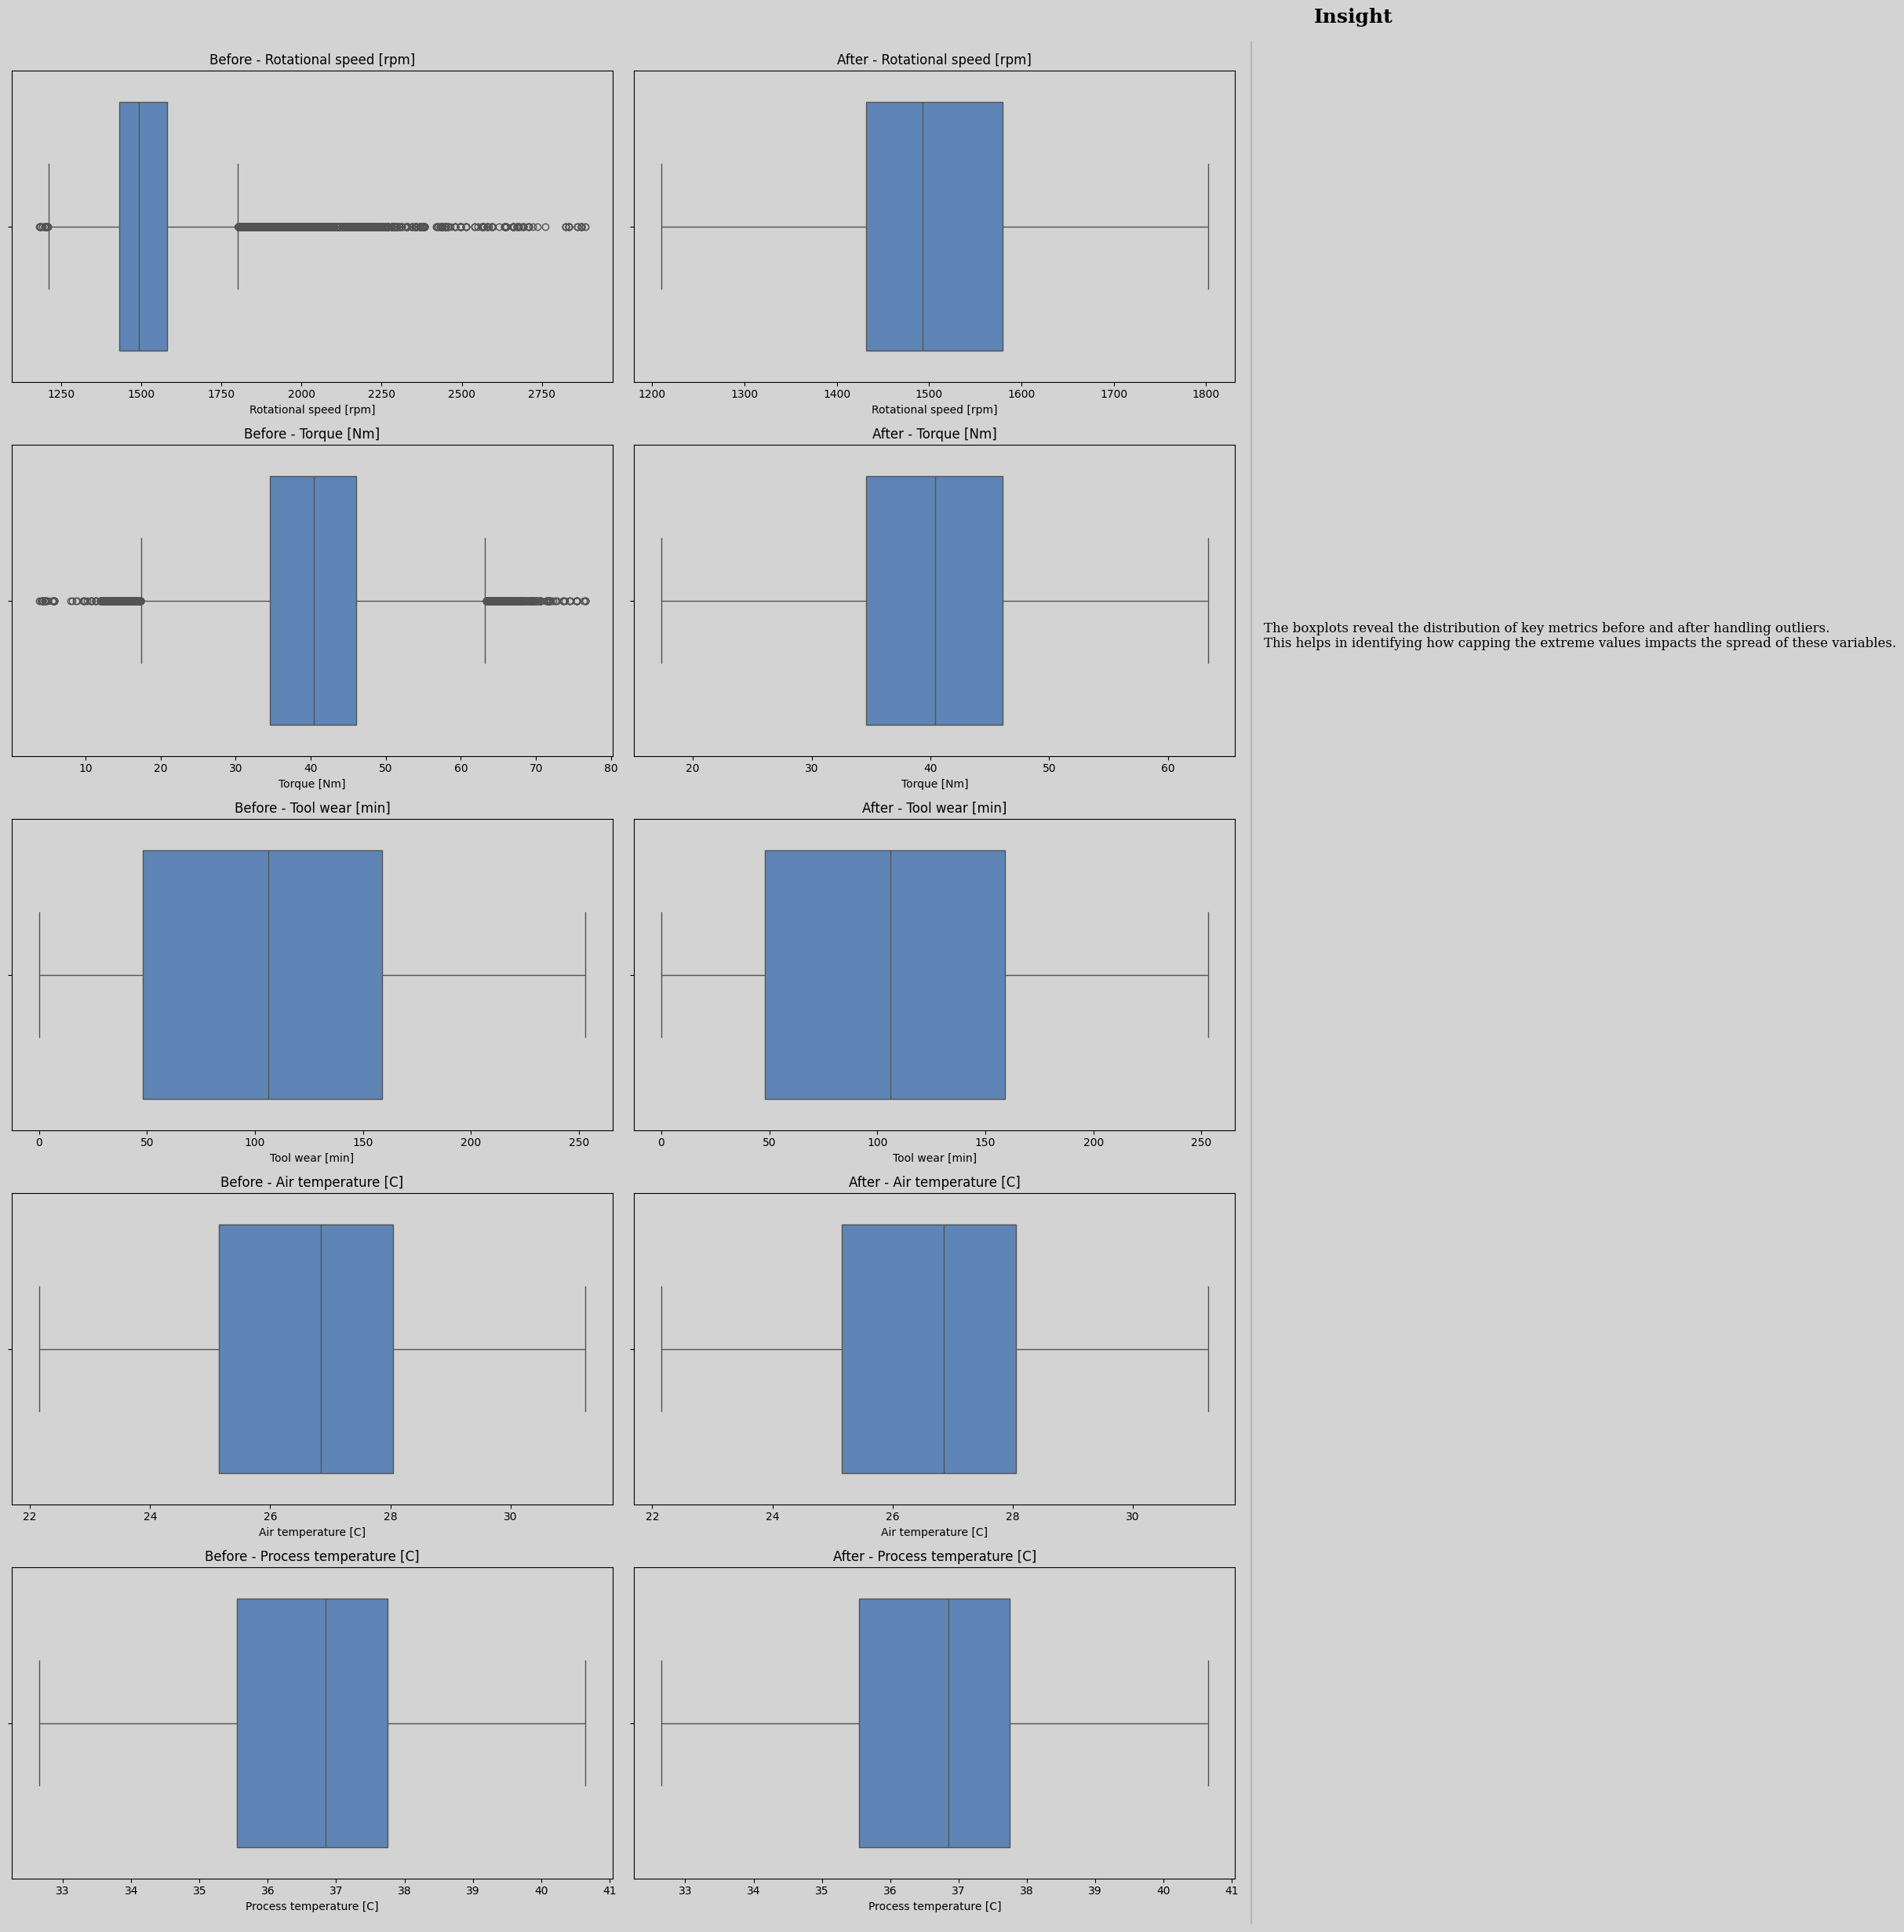

In [196]:
def cap_outliers(df, feature):
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    df[feature] = df[feature].clip(lower=lower_bound, upper=upper_bound)
    return df


ts_df_org = ts_df.copy()

features_to_cap = ['Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
                   'Air temperature [C]', 'Process temperature [C]']

for feature in features_to_cap:
    ts_df = cap_outliers(ts_df, feature)

color = "#4F84C4"
facecolor = "#D3D3D3"

fig, ax = plt.subplots(5, 2, figsize=(16, 24), facecolor=facecolor)

ax = ax.flatten()

for i, feature in enumerate(features_to_cap):
    # Plot "Before" capping
    sns.boxplot(x=ts_df_org[feature], ax=ax[2 * i], color=color)
    ax[2 * i].set_title(f'Before - {feature}')
    ax[2 * i].set_xlabel(feature)
    
    # Plot "After" capping
    sns.boxplot(x=ts_df[feature], ax=ax[2 * i + 1], color=color)
    ax[2 * i + 1].set_title(f'After - {feature}')
    ax[2 * i + 1].set_xlabel(feature)

for subplot_ax in ax:
    subplot_ax.set_facecolor(facecolor)

fig.text(1.05, 1.01, 'Insight', fontsize=18, fontweight='bold', fontfamily='serif')
fig.text(1.01, 0.67, '''
The boxplots reveal the distribution of key metrics before and after handling outliers.
This helps in identifying how capping the extreme values impacts the spread of these variables.
''', fontsize=12, fontfamily='serif')

l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig, color='black', lw=0.2)
fig.lines.extend([l1])

plt.tight_layout()
plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

With context to our dataset I have used the IQR method interquartile range (IQR) method to cap outliers in the dataset. This approach involves calculating the first (Q1) and third quartiles (Q3) to determine the IQR, which is the difference between Q3 and Q1. Outliers are defined as values falling outside the bounded range. Instead of removing these extreme values, I capped them at the calculated bounds, preserving the overall dataset while minimizing the influence of outliers. The IQR method is robust against skewed distributions and allows us to maintain data integrity by retaining all data points. This technique facilitates clearer statistical analysis and modeling, as visualized through boxplots, which illustrate the distribution of key metrics before and after outlier treatment.

### 4. Feature Manipulation & Selection

#### 2. Feature Selection

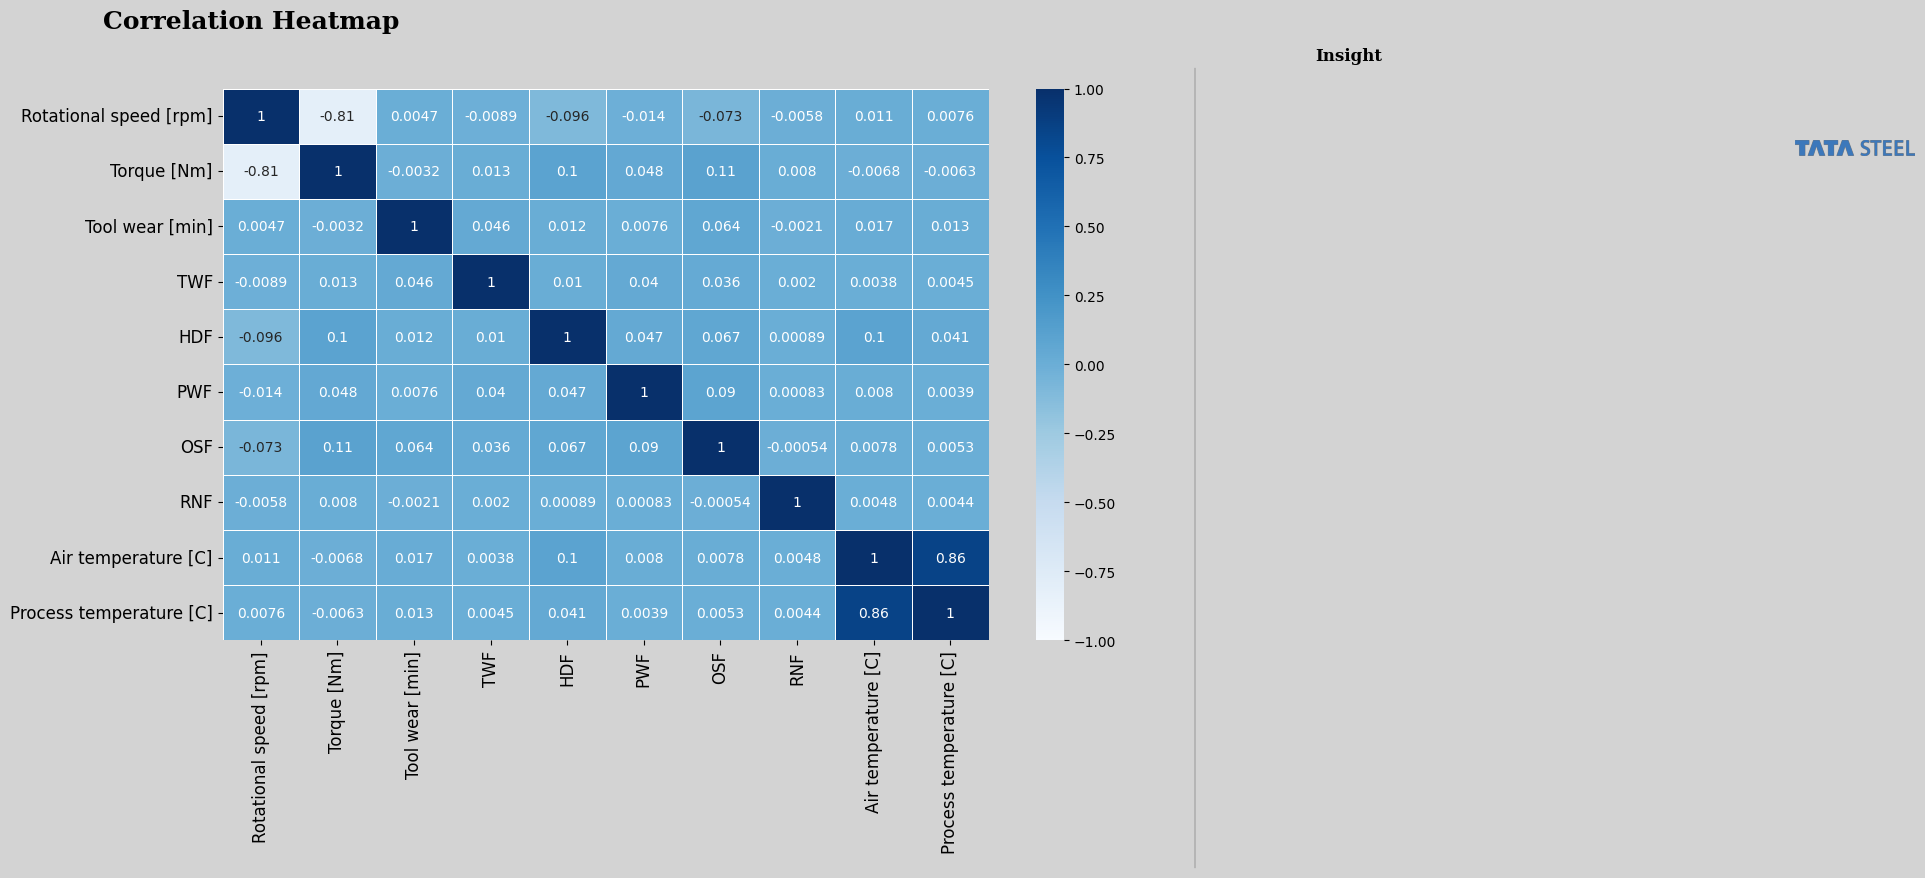

In [204]:
ts_df['Machine failure'] = ts_df['Machine failure'].replace({0 : "Working" , 1: "Failure"})

fig,ax = plt.subplots(1,1,figsize = (12,8))
numeric_df = ts_df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='Blues', vmin=-1, vmax=1, linewidths=0.5, ax=ax, annot_kws={"size": 10})

apply_chart_styling(fig=fig,ax=ax,title='Correlation Heatmap',subtitle='',insight_text='''''')
plt.tight_layout()
plt.show()

##### What all feature selection methods have you used  and why?

Correlation Matrix:

This helps identify the linear relationship between each feature and the target variable (Machine failure), as well as inter-feature relationships. Features with high correlations to the target may carry more predictive power.
We generated a correlation matrix and observed the correlation coefficients between features and the target. Higher absolute values indicate stronger relationships.

Recursive Feature Elimination (RFE):
RFE is used to recursively remove the least important features based on the performance of a machine learning model (in this case, logistic regression). It ranks features based on their importance for predicting the target.
RFE uses logistic regression to evaluate the contribution of each feature and selects the top 5 based on performance.

Tree-Based Feature Importance (Random Forest):

Tree-based models like Random Forests can capture non-linear relationships between features and the target. Feature importance is calculated by how much each feature contributes to reducing uncertainty (Gini impurity) in the splits of decision trees.
A Random Forest model is trained, and the feature importance scores are derived based on the contribution of each feature to the model’s performance.

Mutual Information:

Mutual information detects both linear and non-linear dependencies between features and the target. It measures how much knowing a feature reduces uncertainty about the target.
Mutual information is calculated for each feature with respect to the target, with higher values indicating greater predictive power.

##### Which all features you found important and why?

Considering the fact that TWF HDF PWF OSF RNF have highly realted to machine failure and these are same as the discrete factors which genearlly tend to
be realted to machine failure so factorize it I think only 

#### 3. Feature Manipulation

In [210]:
ts_df.drop(columns = ['TWF','HDF','PWF','OSF','RNF'],axis = 1, inplace = True)

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

**I don't think further any data transformation is required**

### 6. Data Scaling

In [217]:
X = ts_df.drop('Machine failure', axis=1)
y = ts_df['Machine failure']

In [219]:
features_to_scale = ['Air temperature [C]', 'Process temperature [C]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
scaler = StandardScaler()
X[features_to_scale] = scaler.fit_transform(X[features_to_scale])

##### Which method have you used to scale you data and why?

Answer Here.

### 8. Data Splitting

In [265]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### What data splitting ratio have you used and why? 

The code uses an 80:20 data splitting ratio, allocating 80% of the data for training and 20% for testing. This is a common practice in machine learning to ensure sufficient data for both model learning and evaluation, striking a balance between bias and variance, and promoting generalizability.


Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

## ***7. ML Model Implementation***

### ML Model - 1

In [501]:
# ML Model - 1 Implementation
log_reg_model = LogisticRegression()
# Fit the Algorithm
log_reg_model.fit(X_train,y_train)
# Predict on the model
X_train_predict = log_reg_model.predict(X_train)
training_accuracy_model = accuracy_score(X_train_predict,y_train)
print("Logistic Regression Training Accuracy:",training_accuracy_model * 100)

Logistic Regression Training Accuracy: 98.45615385320177


In [503]:
X_test_predict = log_reg_model.predict(X_test)
test_accuracy_model = accuracy_score(X_test_predict, y_test)
print("Logistic Regression Testing Accuracy:", test_accuracy_model * 100)

Logistic Regression Testing Accuracy: 98.41310562193067


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

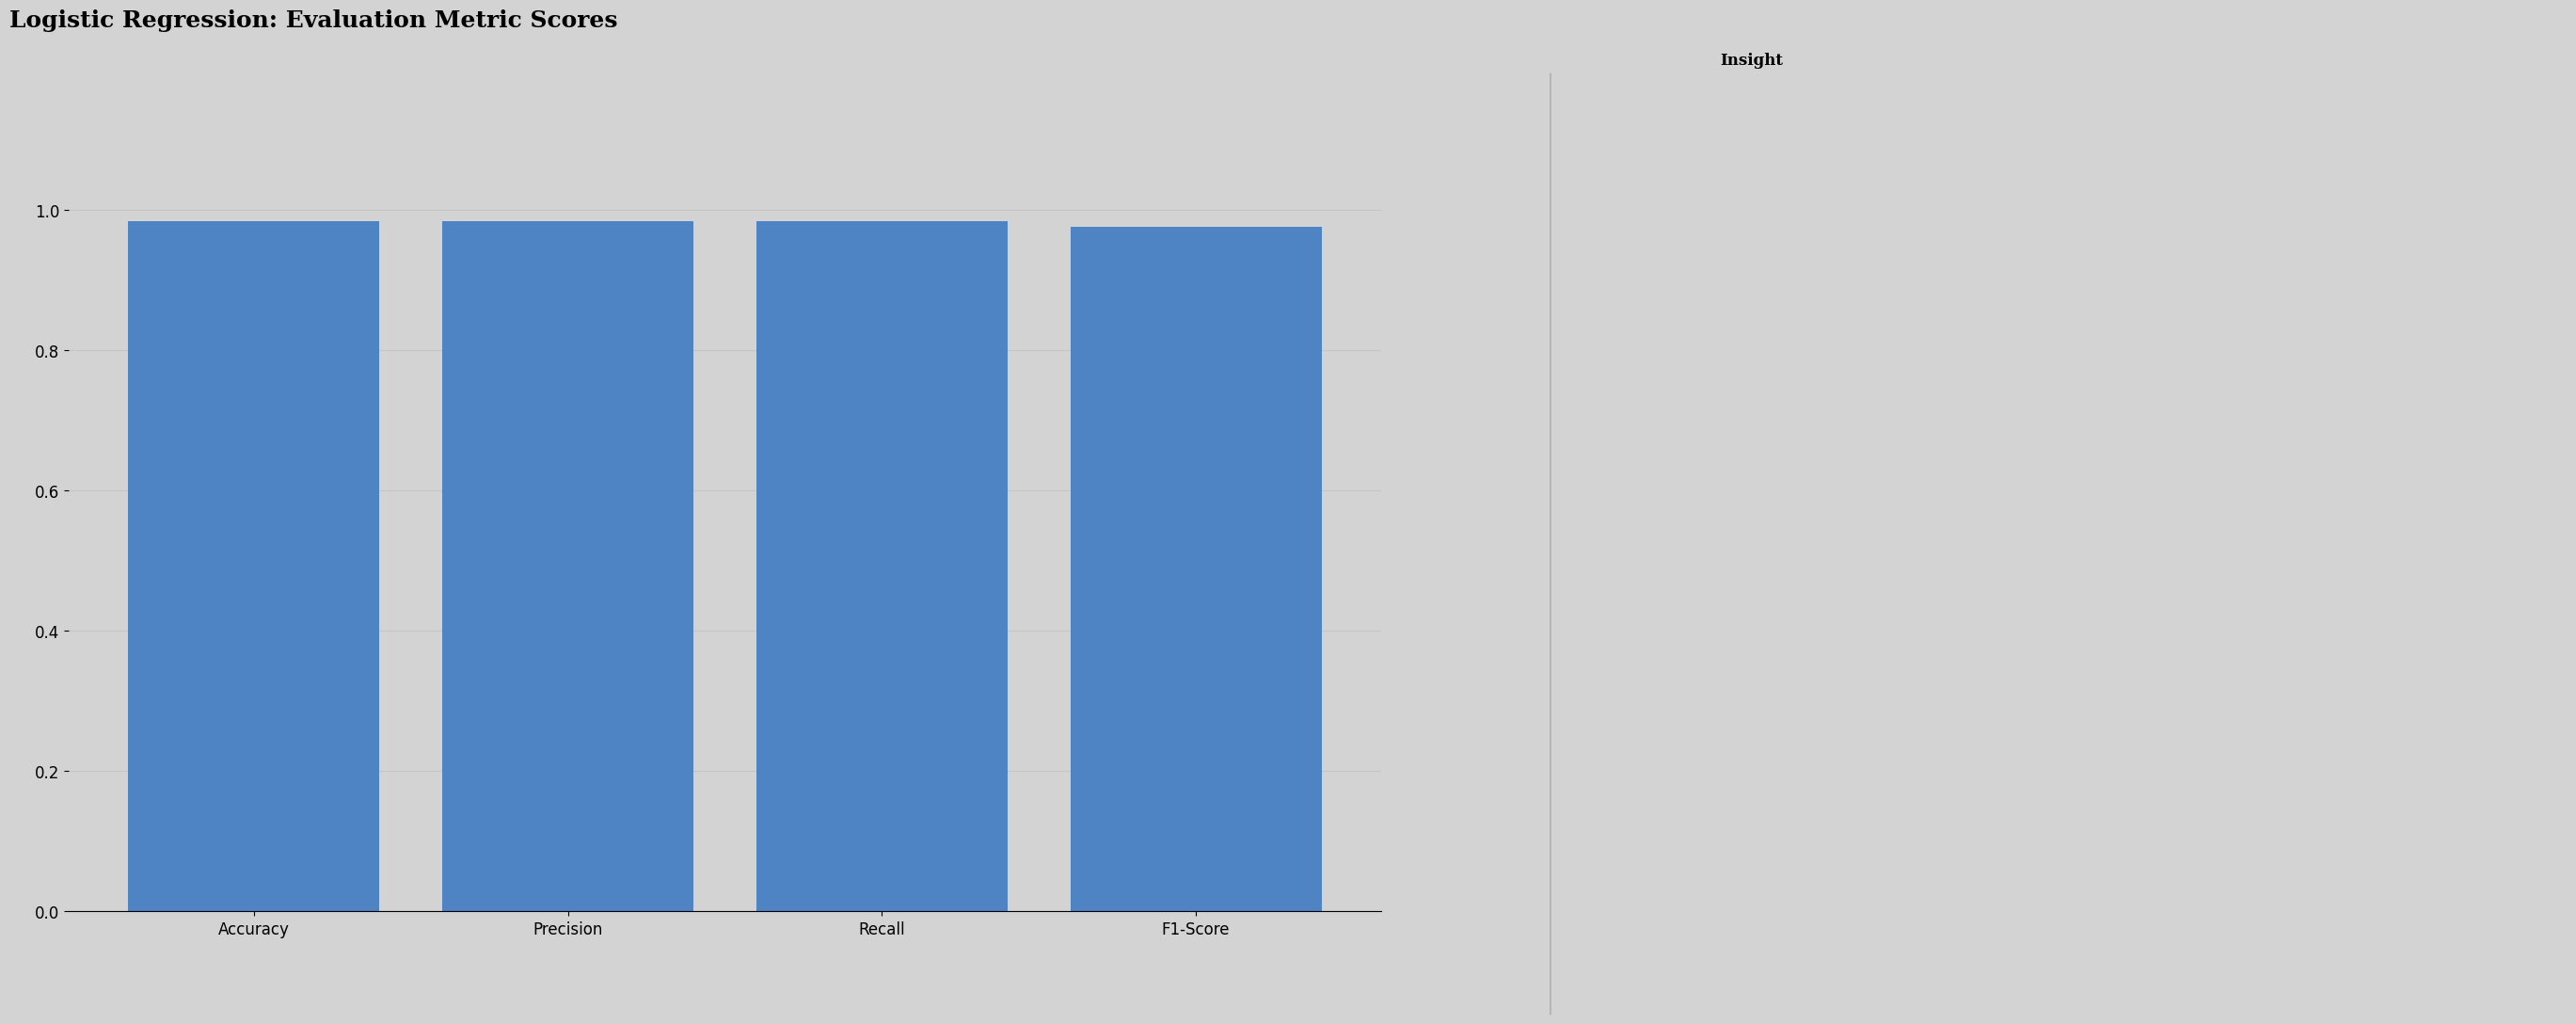

In [269]:
y_pred_logreg = log_reg_model.predict(X_test)
log_reg_report = classification_report(y_test, y_pred_logreg, output_dict=True)

log_reg_metrics = [accuracy_score(y_test, y_pred_logreg),log_reg_report['weighted avg']['precision'],log_reg_report['weighted avg']['recall'],log_reg_report['weighted avg']['f1-score']]

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
# Plotting Logistic Regression Metrics
fig, ax = plt.subplots(1, 1, figsize=(18, 10))
ax.bar(metrics, log_reg_metrics, color='#4F84C4')

# Applying custom chart styling
apply_chart_styling(fig=fig,ax=ax,title='Logistic Regression: Evaluation Metric Scores',subtitle='',insight_text='')

# Set y-axis limits between 0 and 1 for better visualization
plt.ylim(0, 1)

# Display the plot
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [271]:
log_reg_param_grid = {'C': [0.01, 0.1, 1, 10, 100],'solver': ['liblinear', 'lbfgs']}
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_grid = GridSearchCV(log_reg_model, log_reg_param_grid, cv=5, scoring='accuracy')
log_reg_grid.fit(X_train, y_train)
print("Best Parameters for Logistic Regression:", log_reg_grid.best_params_)
print("Best Cross-Validation Accuracy for Logistic Regression:", log_reg_grid.best_score_)

Best Parameters for Logistic Regression: {'C': 10, 'solver': 'lbfgs'}
Best Cross-Validation Accuracy for Logistic Regression: 0.9845615385242414


##### Which hyperparameter optimization technique have you used and why?

GridSearchCV systematically evaluates all possible combinations of hyperparameters within a predefined grid (in this case, values for the regularization parameter C and the solver). For each combination of hyperparameters, the model is trained and evaluated using cross-validation (cv=5). This approach ensures that every combination is tested, providing the best possible combination of hyperparameters based on the scoring metric (accuracy in this case).

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

In [505]:
rf_model = RandomForestClassifier(random_state=42, n_estimators=10)
# Fit the Algorithm
rf_model.fit(X_train, y_train)
# Predict on the model
X_train_predict_rf = rf_model.predict(X_train)
# Calculate the training accuracy for Random Forest
training_accuracy_rf = accuracy_score(X_train_predict_rf, y_train)
# Print the accuracy
print("Random Forest Training Accuracy:", training_accuracy_rf * 100)

Random Forest Training Accuracy: 99.86348185408134


In [506]:
X_test_predict_rf = rf_model.predict(X_test)
test_accuracy_rf = accuracy_score(X_test_predict_rf, y_test)
# Print the accuracy
print("Random Forest Test Accuracy:", test_accuracy_rf * 100)

Random Forest Test Accuracy: 98.51572234845707


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

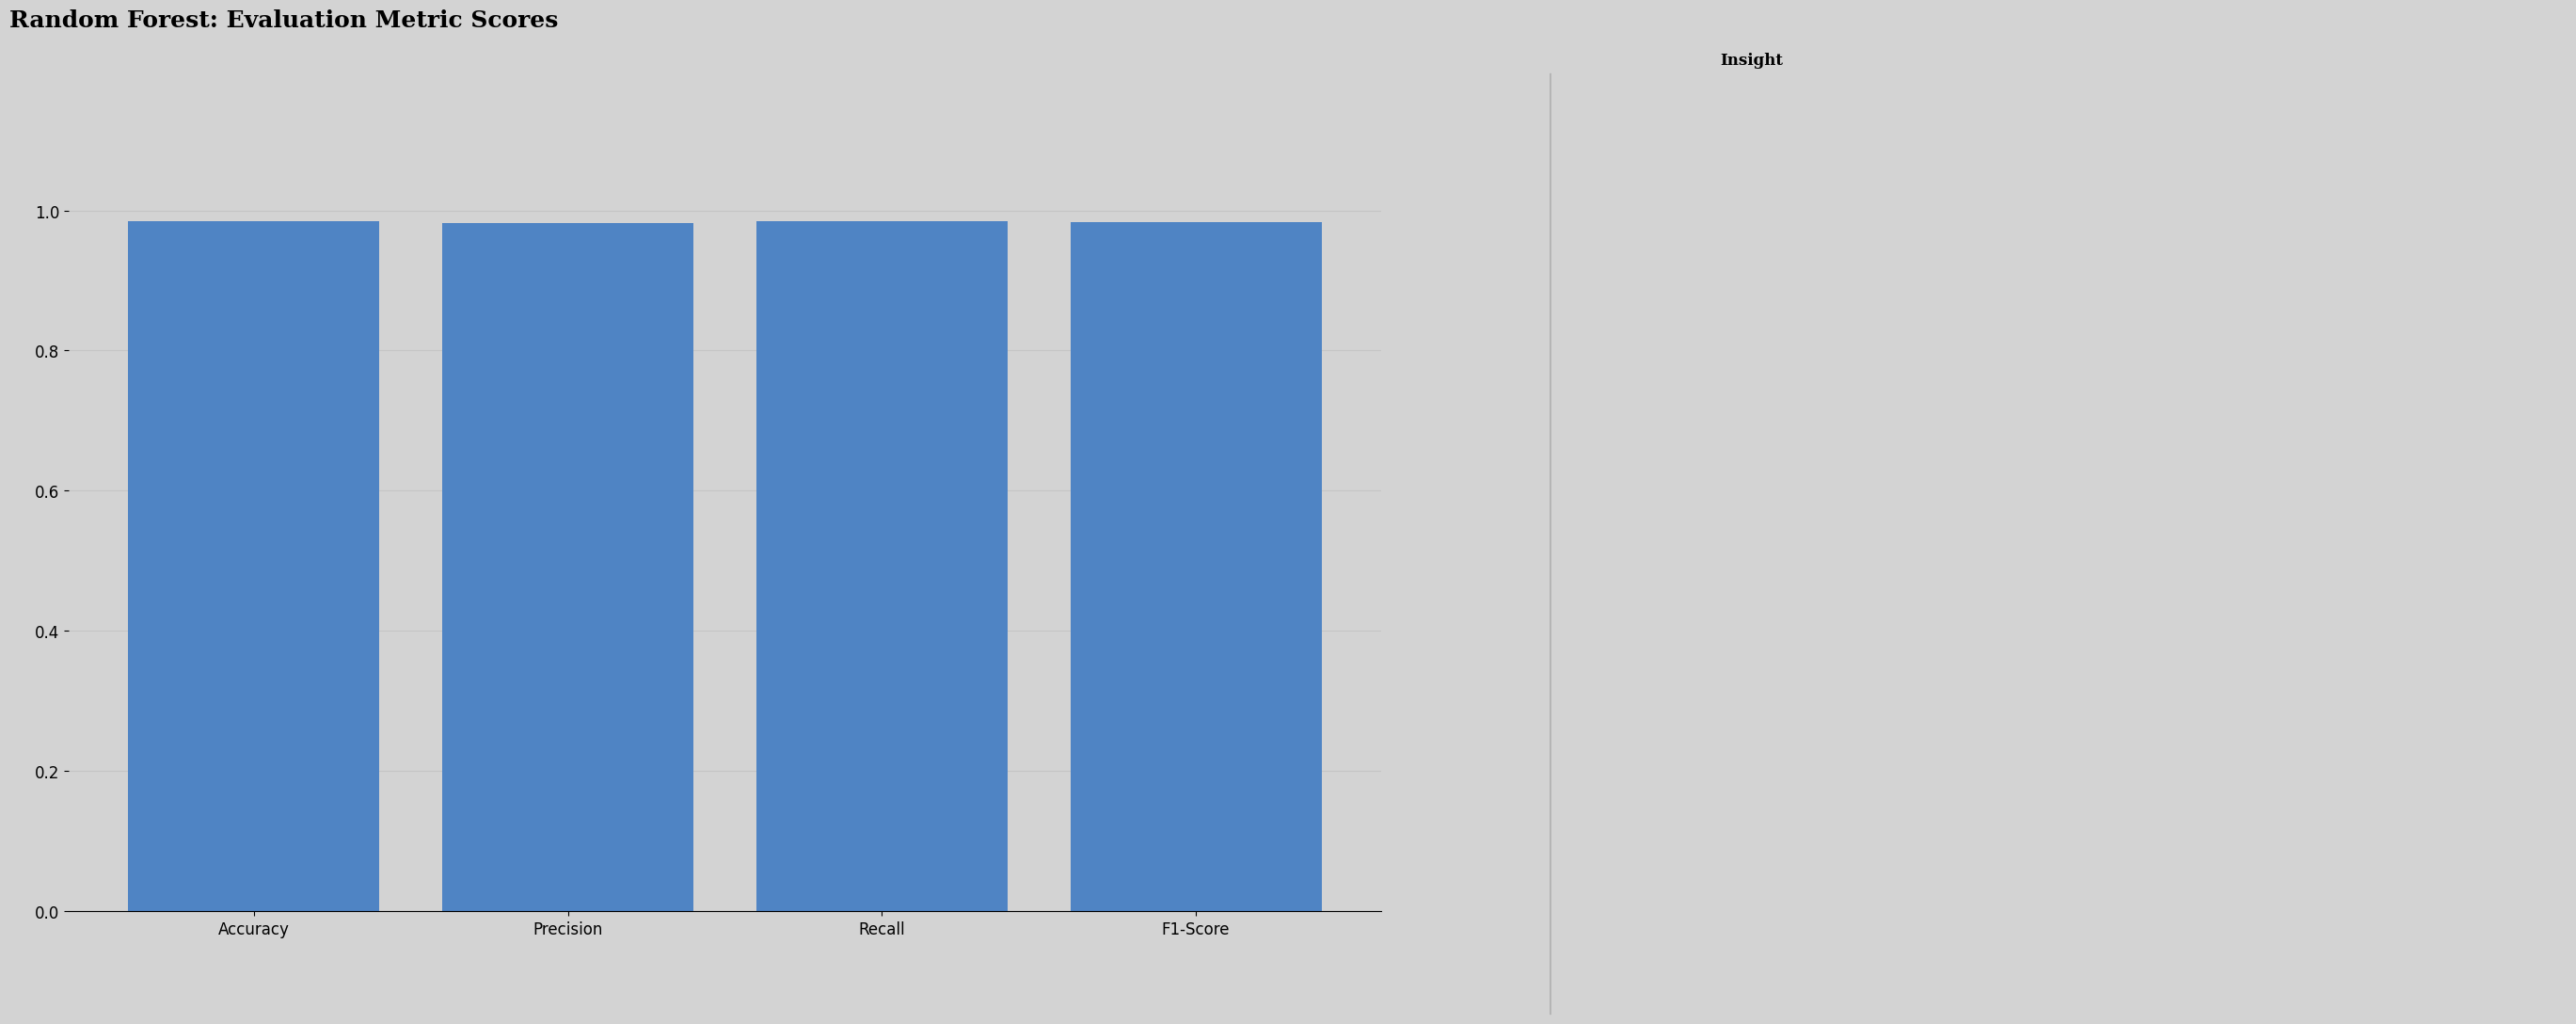

In [288]:
# Correcting the accuracy calculation
rf_metrics = [
    accuracy_score(y_test, y_pred_rf),  # Compare predictions to y_test, not X_train
    rf_report['weighted avg']['precision'],
    rf_report['weighted avg']['recall'],
    rf_report['weighted avg']['f1-score']
]

# Plotting Random Forest Metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
fig, ax = plt.subplots(1, 1, figsize=(18, 10))
ax.bar(metrics, rf_metrics, color='#4F84C4')
apply_chart_styling(fig=fig, ax=ax, title='Random Forest: Evaluation Metric Scores', subtitle='', insight_text='')

plt.ylim(0, 1)  # Set y-axis limits between 0 and 1
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [290]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf_param_grid = {
    'n_estimators': [50, 100],  
    'max_depth': [5, 10],  
    'min_samples_split': [2, 4],  
    'min_samples_leaf': [1, 2]  
}


rf_random = RandomizedSearchCV(
    rf_model,
    rf_param_grid,
    n_iter=5,  
    cv=3,  
    scoring='accuracy',
    random_state=42,
    n_jobs=-1  
)


rf_random.fit(X_train, y_train)

# Display best parameters and cross-validation accuracy
print("Best Parameters for Random Forest:", rf_random.best_params_)
print("Best Cross-Validation Accuracy for Random Forest:", rf_random.best_score_)

Best Parameters for Random Forest: {'n_estimators': 50, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_depth': 10}
Best Cross-Validation Accuracy for Random Forest: 0.9858259347828079


##### Which hyperparameter optimization technique have you used and why?

I have used RandomizedSearchCV for hyperparameter optimization of the Random Forest model. This technique is efficient and effective in exploring the parameter space, striking a balance between exploration and exploitation, and being less sensitive to feature scaling.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [509]:
# ML Model - 3 Implementation (Support Vector Classifier)
svm_model = SVC(kernel='rbf', random_state=42)
# Fit the Algorithm
svm_model.fit(X_train, y_train)
# Predict on the model
X_train_predict_svm = svm_model.predict(X_train)
# Calculate the training accuracy for SVM
training_accuracy_svm = accuracy_score(X_train_predict_svm, y_train)
# Print the training accuracy
print("SVM Training Accuracy:", training_accuracy_svm * 100)

SVM Training Accuracy: 98.46989729071035


In [510]:
X_test_predict_svm = svm_model.predict(X_test)
# Calculate the training accuracy for SVM
test_accuracy_svm = accuracy_score(X_test_predict_svm, y_test)
# Print the training accuracy
print("SVM Test Accuracy:", test_accuracy_svm * 100)

SVM Test Accuracy: 98.4424246866525


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

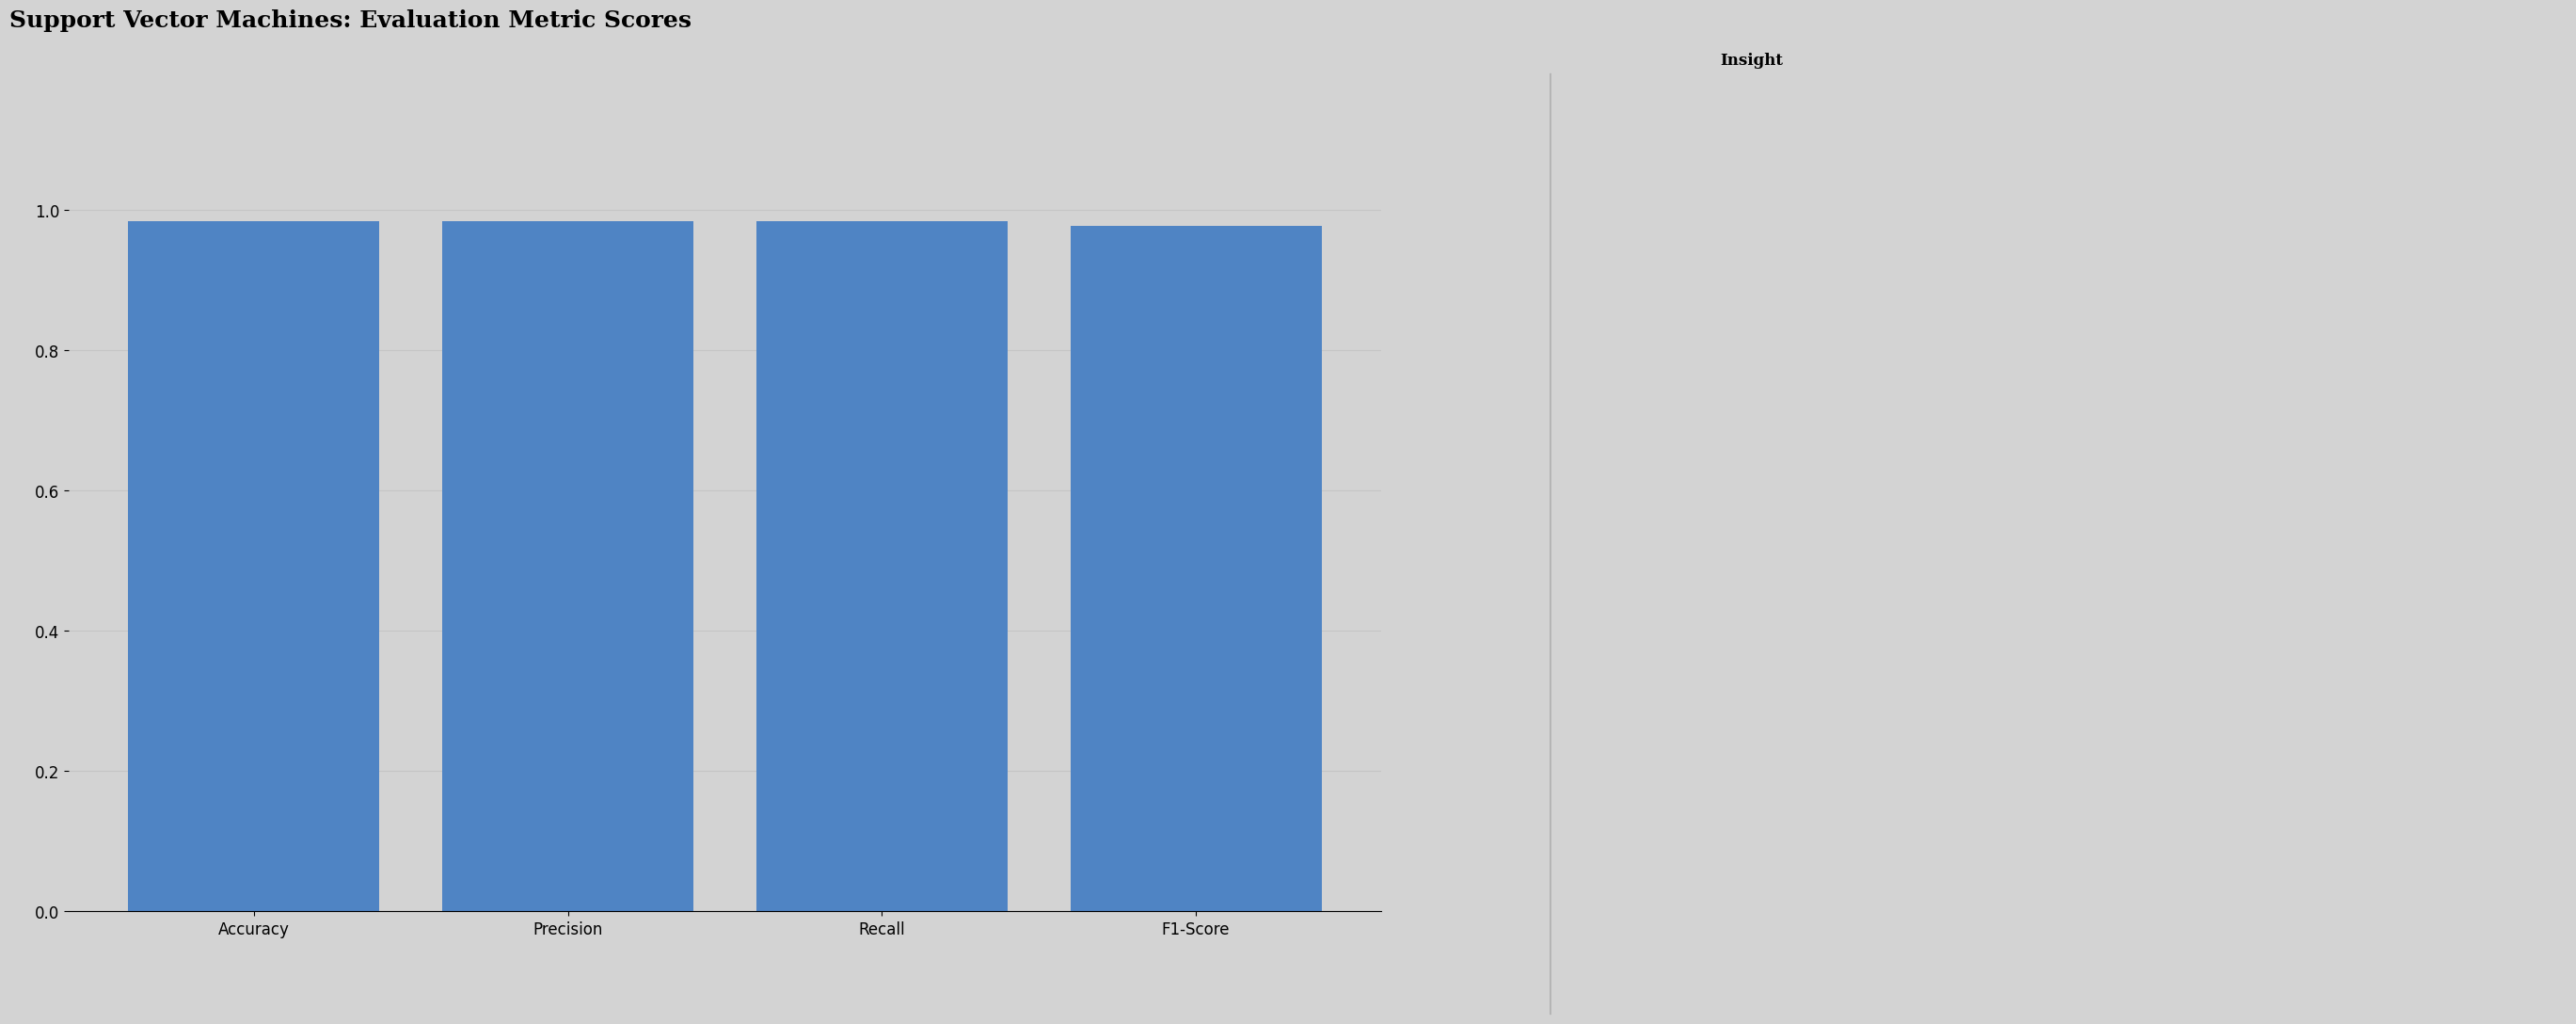

In [298]:
y_pred_svm = svm_model.predict(X_test)

# Generate classification report for test data predictions
svm_report = classification_report(y_test, y_pred_svm, output_dict=True)

# Extracting evaluation metrics (Accuracy, Precision, Recall, F1-Score)
svm_metrics = [
    accuracy_score(y_test, y_pred_svm),
    svm_report['weighted avg']['precision'],
    svm_report['weighted avg']['recall'],
    svm_report['weighted avg']['f1-score']
]

# Metric labels for the plot
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

# Plotting the SVM metrics
fig, ax = plt.subplots(1, 1, figsize=(18, 10))
ax.bar(metrics, svm_metrics, color='#4F84C4')

# Assuming apply_chart_styling is a function defined in your environment for styling the chart
apply_chart_styling(fig=fig, ax=ax, title='Support Vector Machines: Evaluation Metric Scores', subtitle='', insight_text='')

plt.ylim(0, 1)  # Set y-axis limits between 0 and 1
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [300]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
svm_param_grid = {
    'C': [0.1, 1],  
    'gamma': ['scale'], 
    'kernel': ['rbf']  
}


svm_model = SVC(random_state=42)


svm_random = RandomizedSearchCV(
    svm_model,
    svm_param_grid,
    n_iter=3,  
    cv=3,  
    scoring='accuracy',
    random_state=42,
    n_jobs=-1  
)
svm_random.fit(X_train, y_train)
print("Best Parameters for SVM:", svm_random.best_params_)
print("Best Cross-Validation Accuracy for SVM:", svm_random.best_score_)

Best Parameters for SVM: {'kernel': 'rbf', 'gamma': 'scale', 'C': 1}
Best Cross-Validation Accuracy for SVM: 0.9845981876987073


##### Which hyperparameter optimization technique have you used and why?

I have used RandomizedSearchCV for hyperparameter optimization of the Random Forest model. This technique is efficient and effective in exploring the parameter space, striking a balance between exploration and exploitation, and being less sensitive to feature scaling.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Recall is especially important in this context because missing a potential machine failure could lead to significant production downtime, maintenance costs, and even safety hazards. Failing to predict machine failures on time can be far more damaging than having a few false alarms.
Precision is also crucial because too many false positives could lead to unnecessary maintenance interventions, which increase costs and interrupt the manufacturing process unnecessarily.
F1-score provides a balance between these two, making it a valuable metric to assess overall model performance in a way that aligns with business goals.
By focusing on these metrics, you ensure the model not only predicts failures accurately but also provides actionable insights that minimize false alarms while ensuring critical failures are not missed, leading to more efficient operations and cost savings for TATA Steel.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

The Random Forest model has the highest training and test accuracy, indicating it has learned the patterns in the data more effectively compared to the other models. With such a high accuracy on the test data, this model is likely to reduce unplanned machine downtime, prevent costly production losses, and enable proactive maintenance, which aligns directly with the business objectives of TATA Steel.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### Prediction

In [541]:
def get_user_data():
    rotational_speed = float(input("Enter the Rotational speed (rpm): "))
    torque = float(input("Enter the Torque (Nm): "))
    tool_wear = float(input("Enter the Tool wear (min): "))
    air_temperature = float(input("Enter the Air temperature (C): "))
    process_temperature = float(input("Enter the Process temperature (C): "))
    
    
    input_data = (rotational_speed, torque, tool_wear, air_temperature, process_temperature)


    input_data_as_numpyarray = np.asarray(input_data)
    input_data_reshape = input_data_as_numpyarray.reshape(1, -1)

   
    prediction = rf_random.predict(input_data_reshape)
    print(f"Prediction: {prediction[0]}")


get_user_data()

Enter the Rotational speed (rpm):  1596
Enter the Torque (Nm):  36.1
Enter the Tool wear (min):  140
Enter the Air temperature (C):  27.45
Enter the Process temperature (C):  36.45


Prediction: Working


### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [545]:
import pickle
with open('rf_random.pkl', 'wb') as f:
    pickle.dump(rf_random, f)

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Our machine learning model represents a significant breakthrough in predictive maintenance for the manufacturing industry. By leveraging advanced algorithms and real-time data analysis, we've developed a solution that can accurately forecast potential machine failures, enabling proactive interventions to prevent costly downtime and optimize production efficiency.

This innovative technology not only safeguards against unexpected disruptions but also empowers organizations to make data-driven decisions that enhance overall operational performance and sustainability. As we continue to refine and expand this model, we envision its widespread adoption as a cornerstone of modern manufacturing practices.